# Outliers are important to retain in this case

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch , Hyperband
import imblearn

In [2]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
column_names = df.loc[0,:]
column_names = column_names.to_list()
l1 = df.columns
l1 = l1.to_list()
df.columns = column_names
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True)
column_names = df.columns
for column in column_names:
    df[column] = pd.to_numeric(df[column]) 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.drop(columns={'ID'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [7]:
rules = {
    1: (df['LIMIT_BAL'] <= 20000),
    2: (df['LIMIT_BAL'] > 20000) & (df['LIMIT_BAL'] <= 50000 ), 
    3: (df['LIMIT_BAL'] > 50000) & (df['LIMIT_BAL'] <= 100000),
    4: (df['LIMIT_BAL'] > 100000) & (df['LIMIT_BAL'] <= 200000),
    5: (df['LIMIT_BAL'] > 200000)
}

df['BAL_CAT'] = np.select(rules.values(), rules.keys(), default= 6)
df['BAL_CAT'].astype('int64')
print(df['BAL_CAT'].value_counts())
df['LIMIT_BAL'].groupby(df['BAL_CAT']).aggregate(func= [np.mean, np.sum, np.min, np.max])


5    9622
4    7880
2    5205
3    4822
1    2471
Name: BAL_CAT, dtype: int64


,mean,sum,amin,amax
BAL_CAT,,,,
1,18001.618778,44482000,10000,20000
2,43371.757925,225750000,30000,50000
3,80759.021153,389420000,60000,100000
4,158327.411168,1247620000,110000,200000
5,323971.906049,3117257680,210000,1000000


In [8]:
print(df['SEX'].unique())
print(df['EDUCATION'].unique())
print(df['MARRIAGE'].unique())
# Marriage have some issue
print(df['MARRIAGE'].value_counts(),"BEFORE")
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3, regex=True)
print(df['MARRIAGE'].value_counts(),"AFTER")
df.head()

[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 BEFORE
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64 AFTER


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BAL_CAT
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,689,0,0,0,0,1,1
2,120000,2,2,2,26,0,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,4
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,3
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
5,50000,1,2,1,57,0,0,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,2


# Checking distribution of Data

### Prametric Statistics

In [39]:
from scipy.stats import rankdata
from scipy.stats import skew
from scipy.stats import mannwhitneyu
df2 = df.copy(deep = True)
df2['AGE'] = df2['AGE'].sort_values(ascending = True)
df2['LIMIT_BAL'] = df2['LIMIT_BAL'].sort_values(ascending = True)

df2['AGE'] = rankdata(df2['AGE'].values, method = 'dense')
df2['LIMIT_BAL'] = rankdata(df2['LIMIT_BAL'].values, method = 'dense')
df2.head(10)
print(df2['AGE'].describe())
print(len(df['AGE'].unique()) , len(df['LIMIT_BAL'].unique()))
print(skew(df2['AGE']) , skew(df2['LIMIT_BAL']))


stat, p = mannwhitneyu(df2['AGE'], df2['LIMIT_BAL'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


count    30000.000000
mean        15.485400
std          9.217448
min          1.000000
25%          8.000000
50%         14.000000
75%         21.000000
max         56.000000
Name: AGE, dtype: float64
56 81
0.731673895658113 1.016294367354065
Statistics=429941974.000, p=0.000
Different distribution (reject H0)


In [25]:
df2['AGE'].values

array([24, 26, 34, ..., 37, 41, 46], dtype=int64)

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


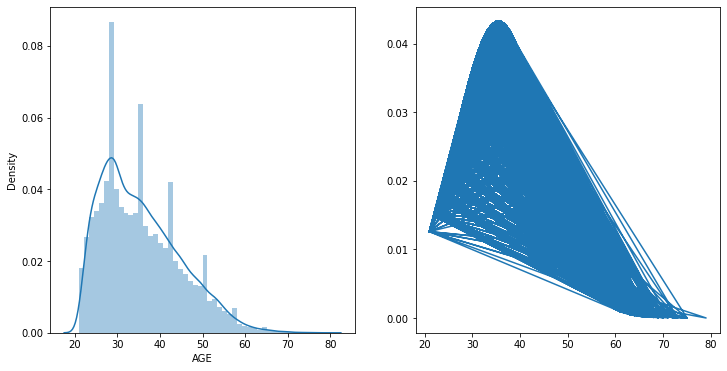

In [9]:
#                                   Norm module do not work with this data's distribution
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
pyplot.figure(figsize = (12,6))
pyplot.subplot(1,2,1)
sns.distplot(df['AGE'])
mean = df['AGE'].mean()
stdev = df['AGE'].std()
# calculate the pdf
pdf = norm.pdf(df['AGE'], mean, stdev)
# plot
pyplot.subplot(1,2,2)
pyplot.plot(df['AGE'], pdf)
pyplot.show()

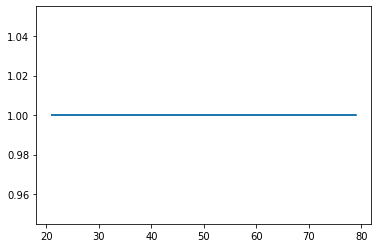

In [10]:
#                                   Norm module do not work with this data's distribution
cdf = norm.cdf(df['AGE'])
pyplot.plot(df['AGE'], cdf)
pyplot.show()

35.4855 9.217904068090188


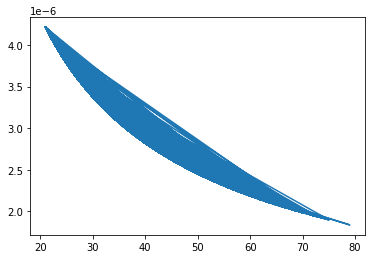

In [11]:
import matplotlib.pyplot as plt

from scipy.stats import lognorm
mean = df['AGE'].mean()
stdev = df['AGE'].std()
# Calculate the pdf
import math
from scipy import stats
print(mean , stdev)
stddev = stdev
mu = mean
dist=lognorm( s=stdev , scale = math.exp(mu))
plt.plot(df['AGE'],dist.pdf(df['AGE']))

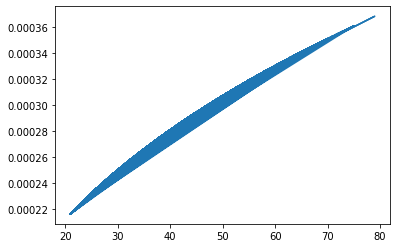

In [12]:
plt.plot(df['AGE'],dist.cdf(df['AGE']))

35.4855

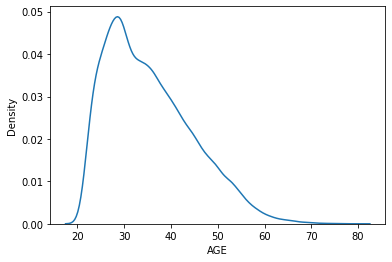

In [13]:
import seaborn as sns
sns.kdeplot(df['AGE'])
df['AGE'].mean()

4.654949655675794
2.651169734836069


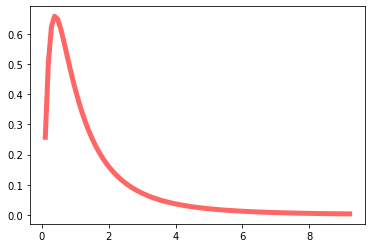

In [19]:
s = 0.954
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
plt.plot(x, lognorm.pdf(x, s),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')
print(x.mean())
print(x.std())

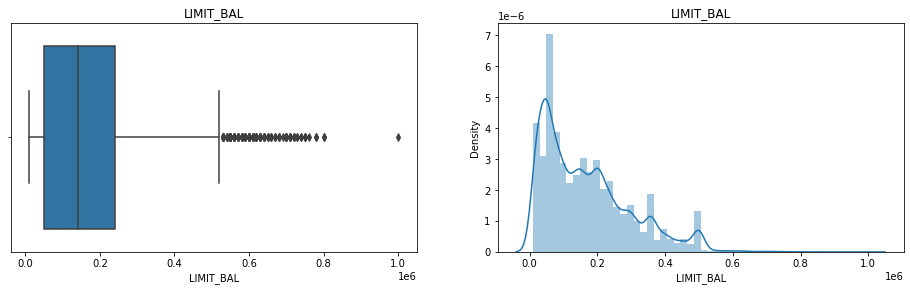

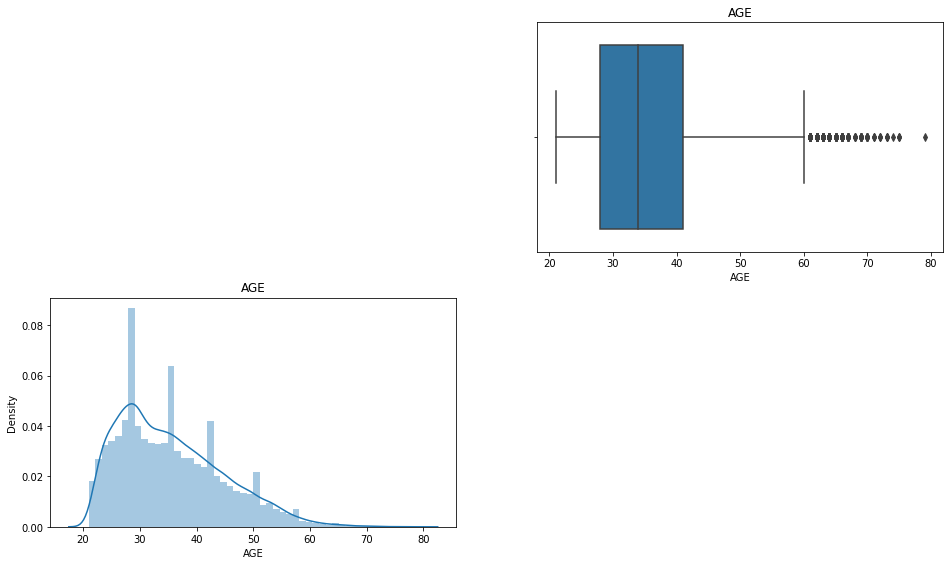

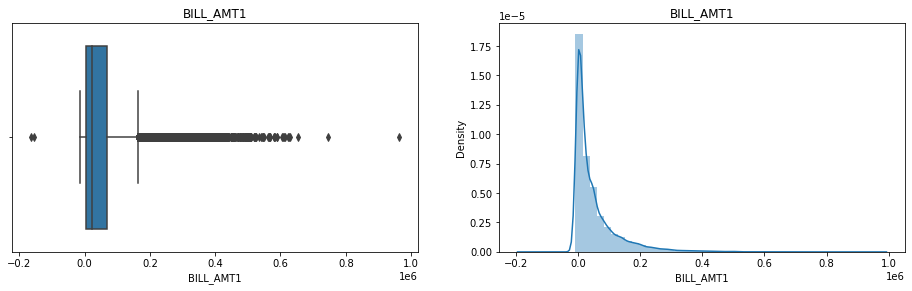

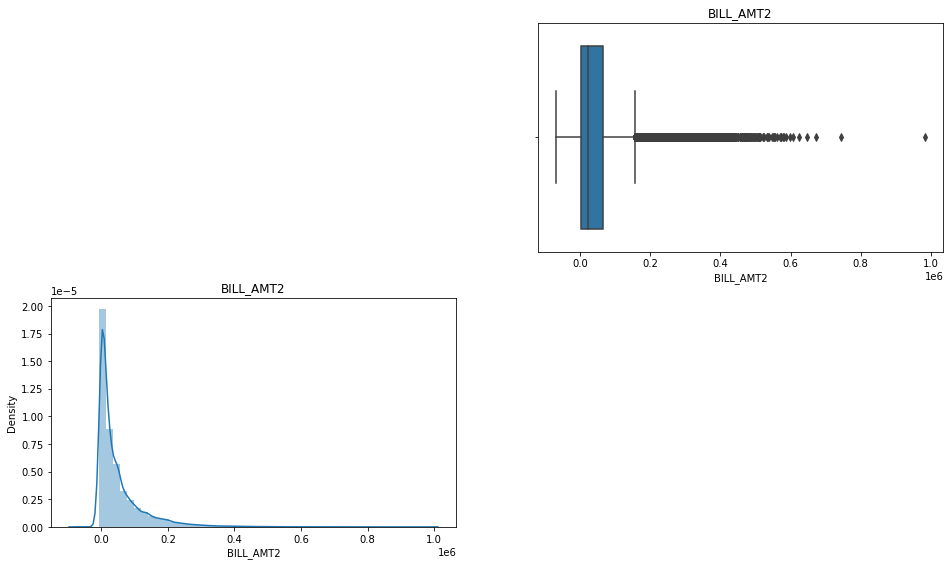

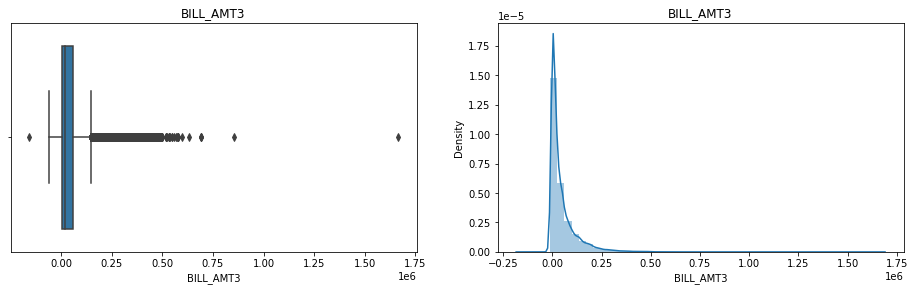

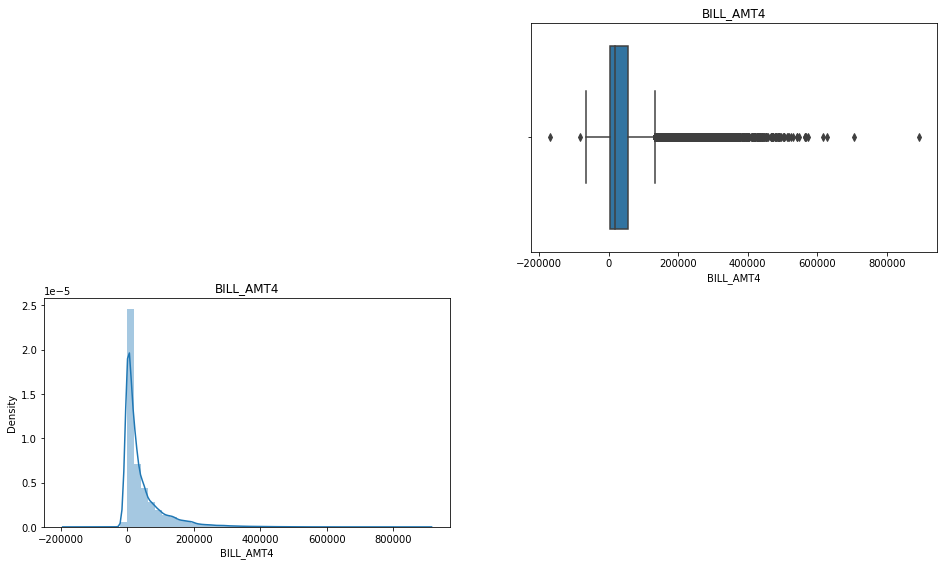

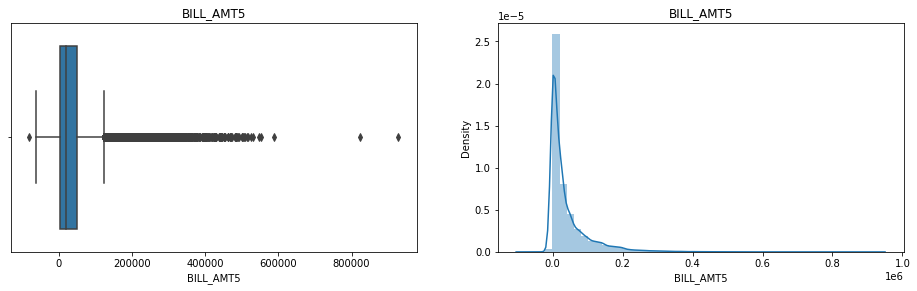

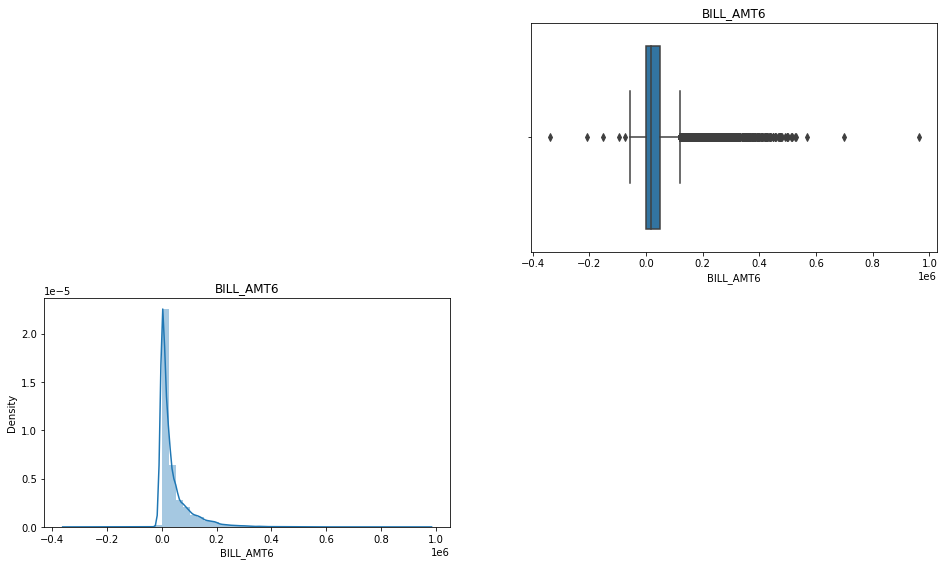

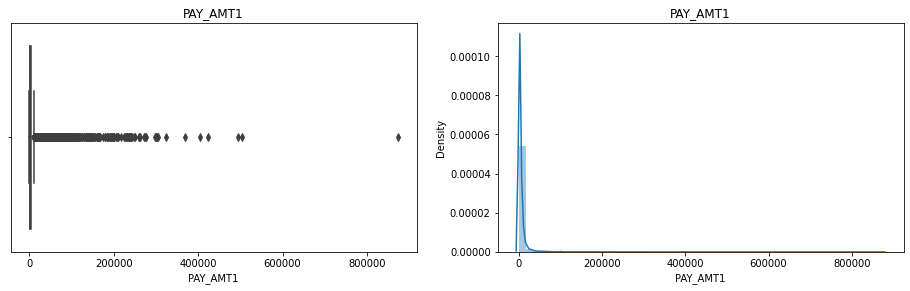

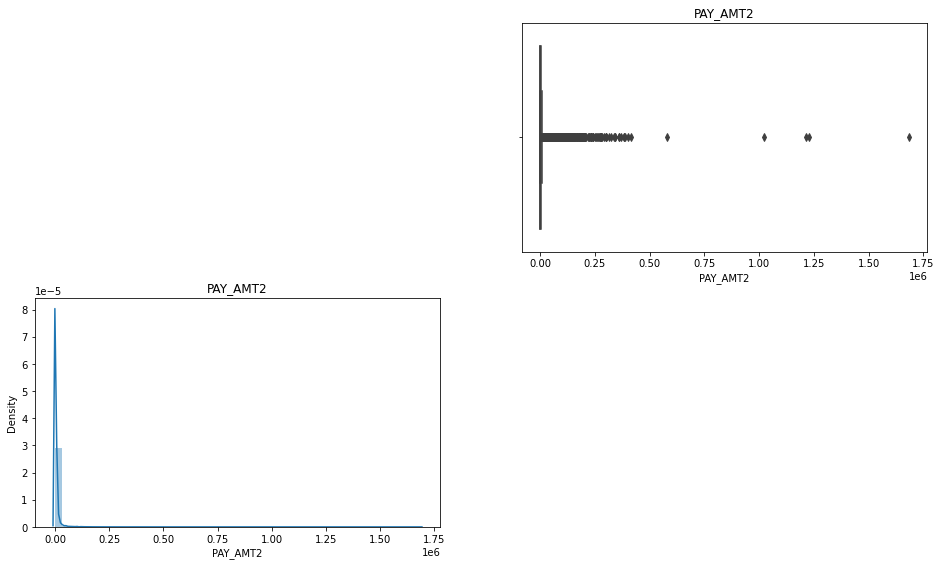

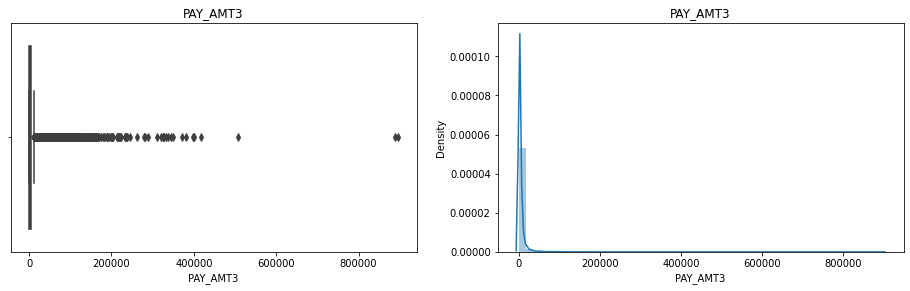

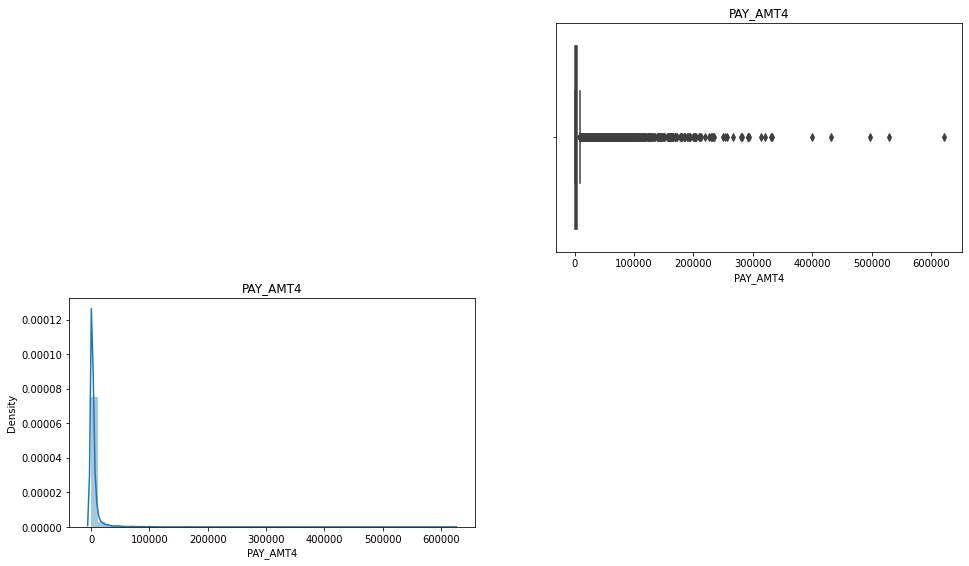

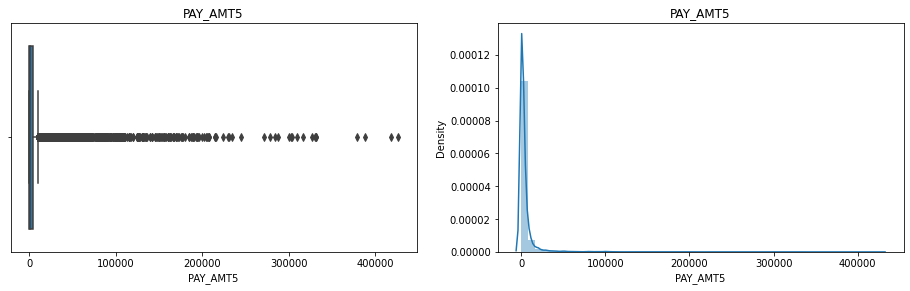

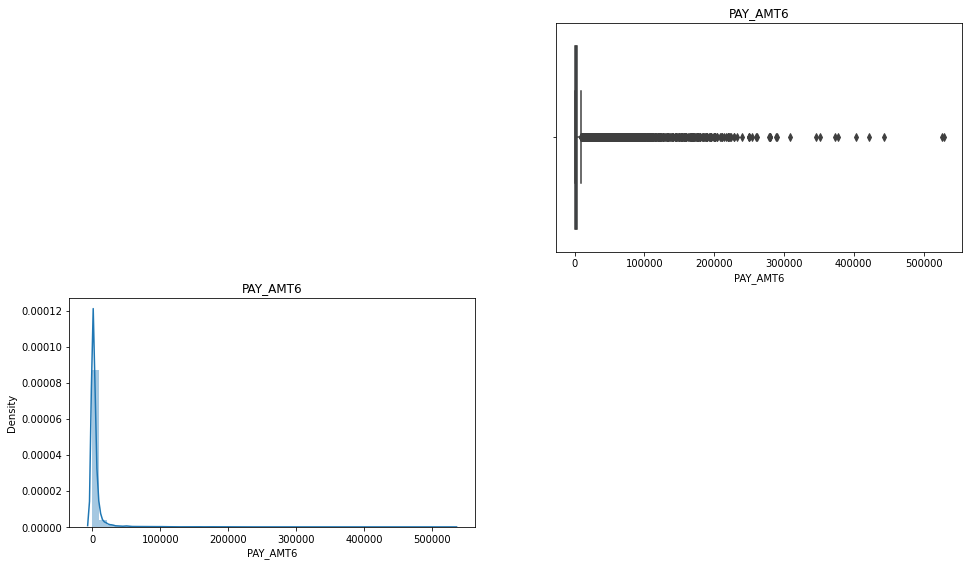

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',100)
l1=  ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
      'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for i in range(len(l1)):
    plt.figure(figsize=(16,70))
    plt.subplot(len(l1),2,i+1)
    plt.title('{}'.format(l1[i]))
    sns.boxplot(df[l1[i]])
    plt.subplot(len(l1),2,i+2)
    plt.title('{}'.format(l1[i]))
    sns.distplot(df[l1[i]])
        

In [21]:
def outlier_check(data):
    return((x - np.mean(data)/np.std()))

<AxesSubplot:xlabel='LIMIT_BAL'>

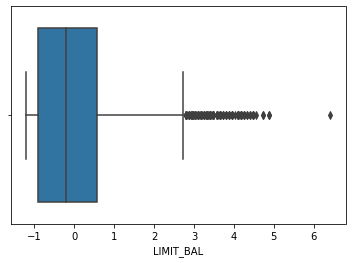

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = df.copy(deep=True)
df2[['LIMIT_BAL','AGE']] = sc.fit_transform(df2[['LIMIT_BAL','AGE']])
sns.boxplot(df2['LIMIT_BAL'])


In [23]:
#                 The first array contains the list of row numbers and second array respective column numbers,
from scipy import stats
import numpy as np
z = (stats.zscore(df2[['AGE','LIMIT_BAL']]))
print(np.where(z > 3))
# It also give lower range

(array([   12,   246,   387,   433,   451,   527,   555,   737,   811,
        1029,  1058,  1073,  1095,  1194,  1231,  1347,  1505,  1583,
        1644,  1711,  1883,  1904,  1991,  1992,  1992,  2104,  2134,
        2197,  2222,  2351,  2366,  2426,  3257,  3314,  3402,  3405,
        3595,  3632,  3689,  3733,  3773,  3988,  4033,  4243,  4251,
        4495,  4550,  4603,  4754,  4859,  5333,  5415,  5498,  5512,
        5808,  5816,  5824,  5878,  6023,  6076,  6079,  6083,  6637,
        6713,  6722,  6781,  6866,  6912,  6947,  6953,  6955,  7165,
        7221,  7312,  7335,  7356,  7593,  7681,  7932,  8082,  8159,
        8282,  8448,  8566,  8596,  8810,  8844,  8880,  8940,  9008,
        9014,  9138,  9311,  9312,  9376,  9386,  9399,  9738,  9832,
       10089, 10341, 10418, 10549, 10647, 10699, 10895, 10960, 11137,
       11210, 11533, 11766, 11806, 11966, 11992, 12018, 12504, 12888,
       13029, 13046, 13112, 13156, 13166, 13168, 13186, 13325, 13371,
       13442, 13559

In [24]:
#                This method is good
"""Q1,Q3 = np.percentile(df,[25,75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
print(Q1 , Q3 , IQR , upper_bound)
"""
l1=  ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
      'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

Q3 = df[l1].quantile(0.75)
Q1 = df[l1].quantile(0.25)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR

print( Q3 ,Q1 ,IQR, upper_bound)
print(upper_bound.keys()[1])
print(upper_bound[1])

LIMIT_BAL    240000.00
AGE              41.00
BILL_AMT1     67091.00
BILL_AMT2     64006.25
BILL_AMT3     60164.75
BILL_AMT4     54506.00
BILL_AMT5     50190.50
BILL_AMT6     49198.25
PAY_AMT1       5006.00
PAY_AMT2       5000.00
PAY_AMT3       4505.00
PAY_AMT4       4013.25
PAY_AMT5       4031.50
PAY_AMT6       4000.00
Name: 0.75, dtype: float64 LIMIT_BAL    50000.00
AGE             28.00
BILL_AMT1     3558.75
BILL_AMT2     2984.75
BILL_AMT3     2666.25
BILL_AMT4     2326.75
BILL_AMT5     1763.00
BILL_AMT6     1256.00
PAY_AMT1      1000.00
PAY_AMT2       833.00
PAY_AMT3       390.00
PAY_AMT4       296.00
PAY_AMT5       252.50
PAY_AMT6       117.75
Name: 0.25, dtype: float64 LIMIT_BAL    190000.00
AGE              13.00
BILL_AMT1     63532.25
BILL_AMT2     61021.50
BILL_AMT3     57498.50
BILL_AMT4     52179.25
BILL_AMT5     48427.50
BILL_AMT6     47942.25
PAY_AMT1       4006.00
PAY_AMT2       4167.00
PAY_AMT3       4115.00
PAY_AMT4       3717.25
PAY_AMT5       3779.00
PAY_AMT6       38

In [25]:
df_in = df[~(df[l1] > (upper_bound)).any(axis=1)]
print(df.shape)
df_out = df[(df[upper_bound.keys()[0]] > upper_bound[0]) & (df[upper_bound.keys()[1]] > upper_bound[1])  ]
df_out
df_in.shape

(30000, 25)


(19549, 25)

In [26]:
print(df['default payment next month'].value_counts())
print(df_in['default payment next month'].value_counts())

0    23364
1     6636
Name: default payment next month, dtype: int64
0    14504
1     5045
Name: default payment next month, dtype: int64


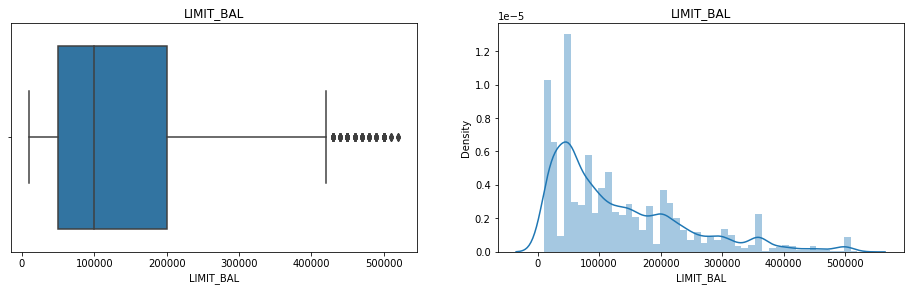

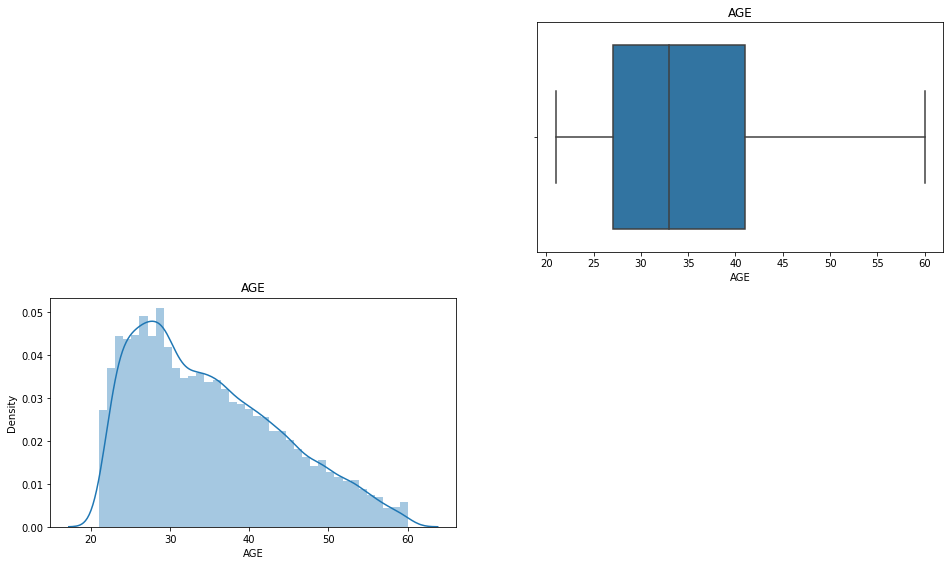

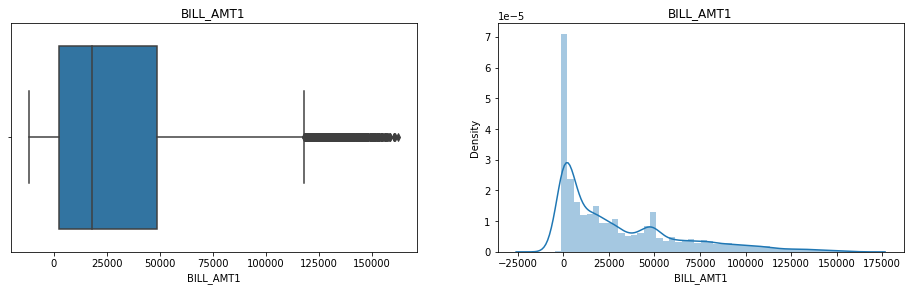

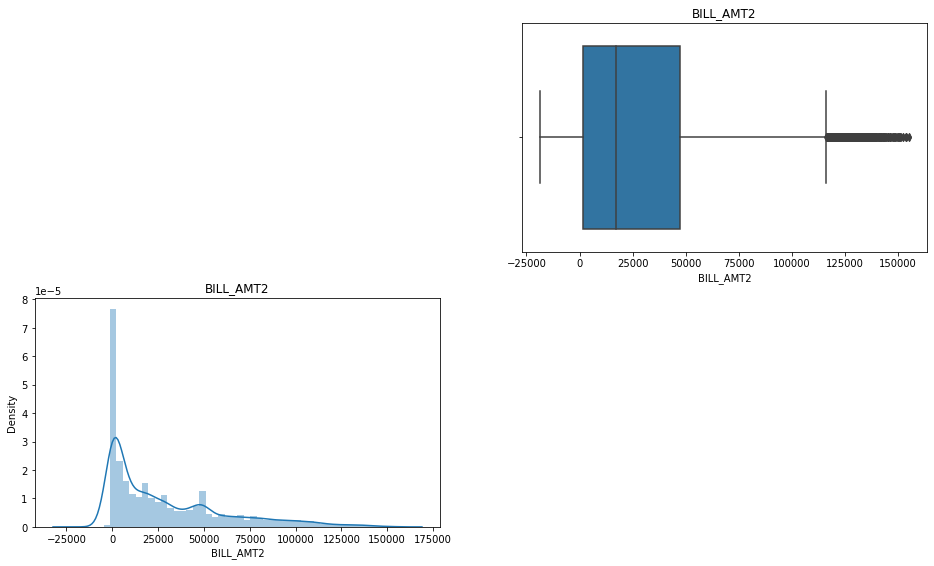

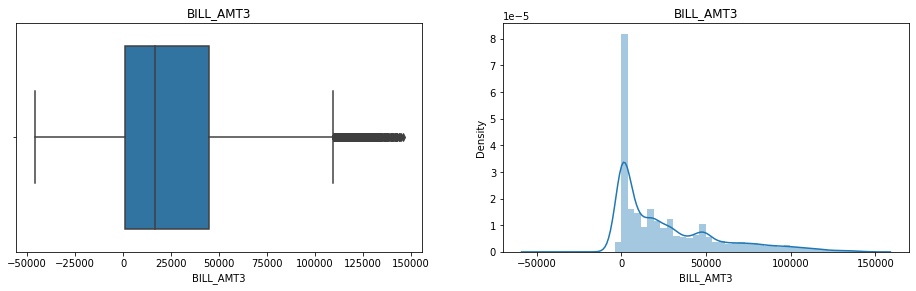

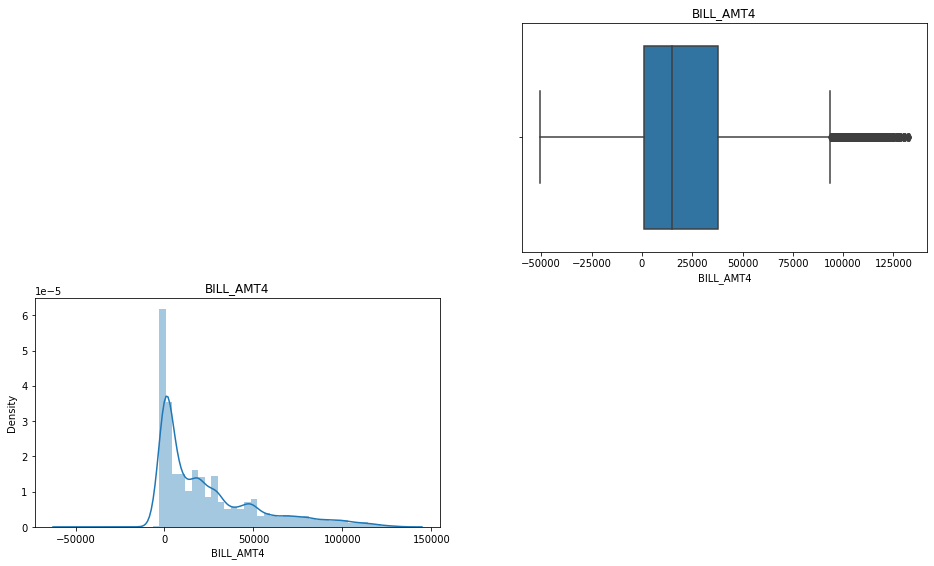

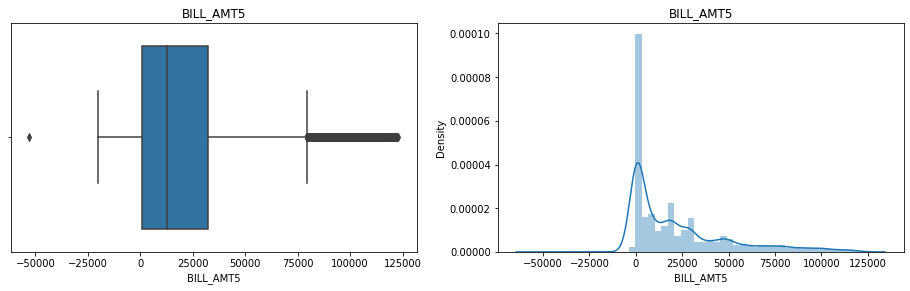

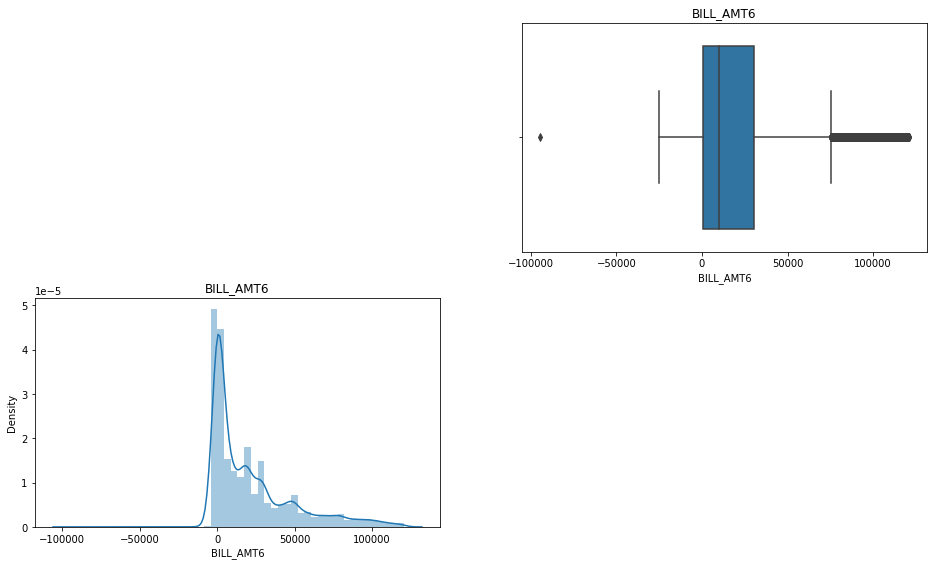

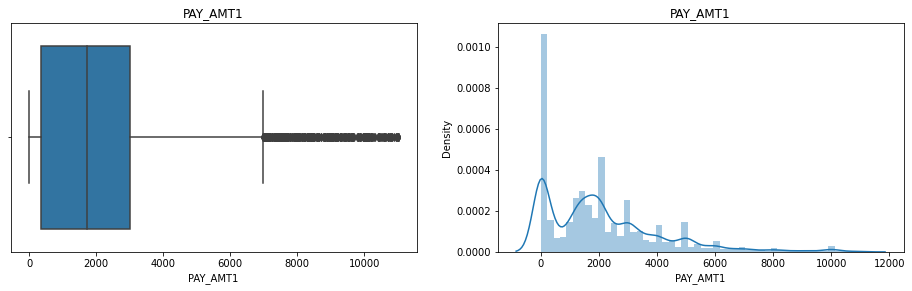

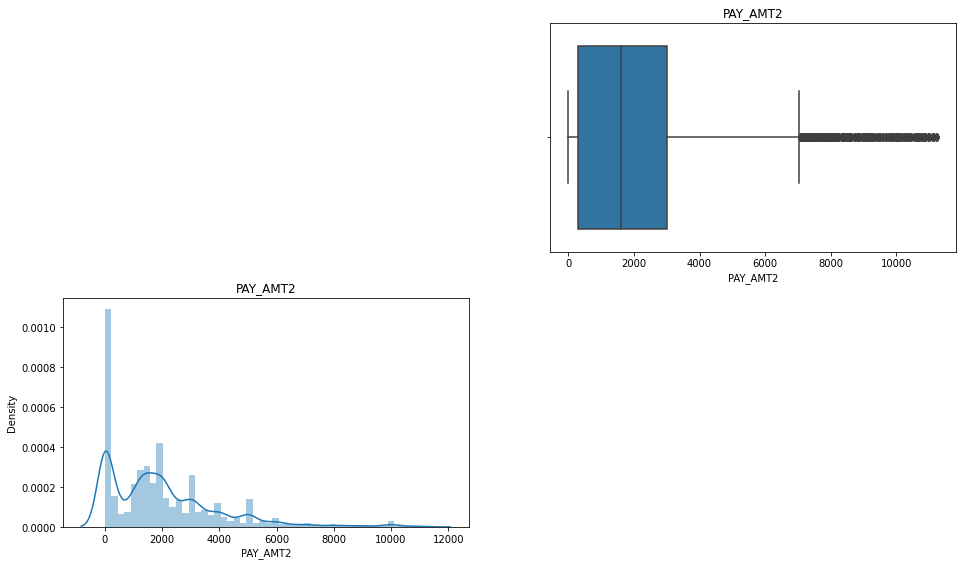

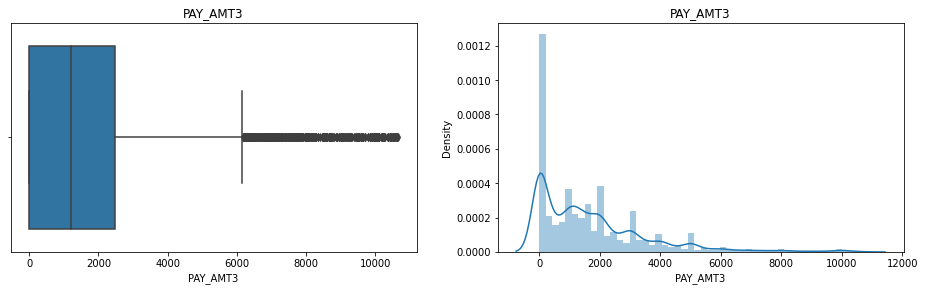

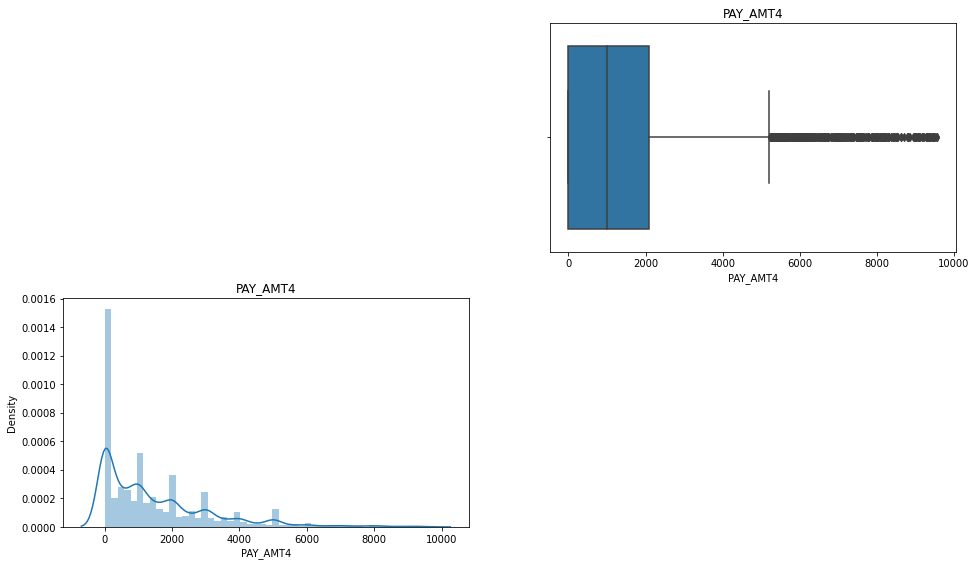

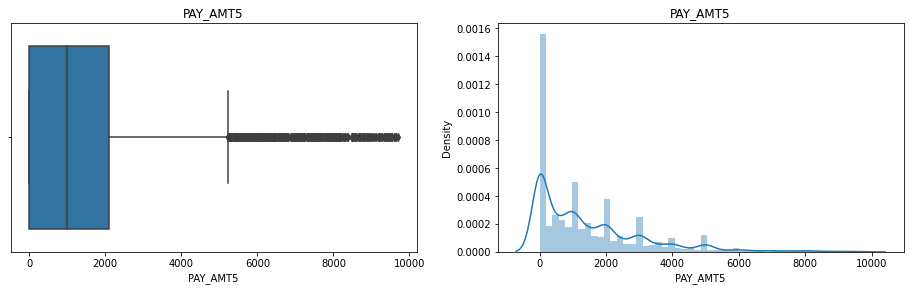

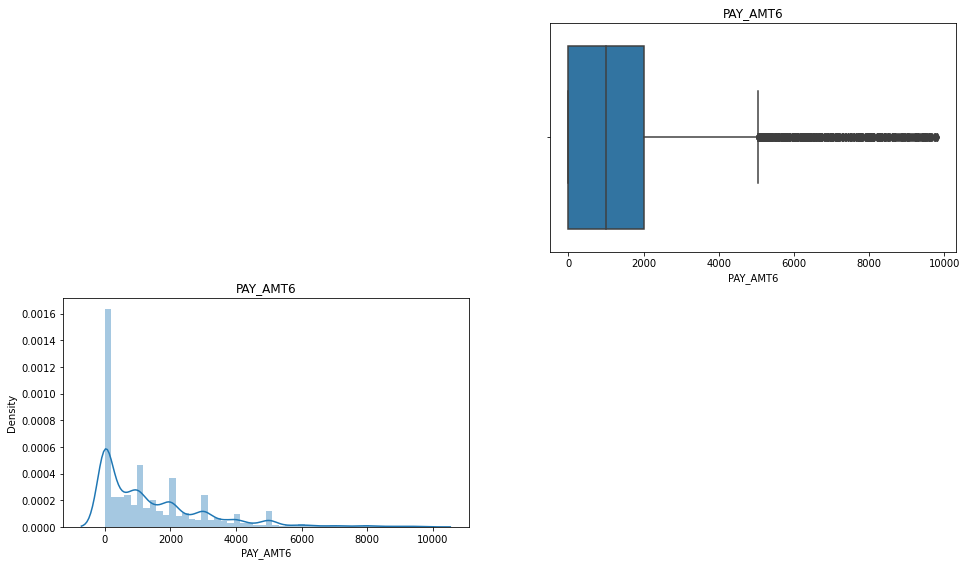

In [27]:
# Full Data without outliers ( manual)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(len(l1)):
    plt.figure(figsize=(16,70))
    plt.subplot(len(l1),2,i+1)
    plt.title('{}'.format(l1[i]))
    sns.boxplot(df_in[l1[i]])
    plt.subplot(len(l1),2,i+2)
    plt.title('{}'.format(l1[i]))
    sns.distplot(df_in[l1[i]])
        

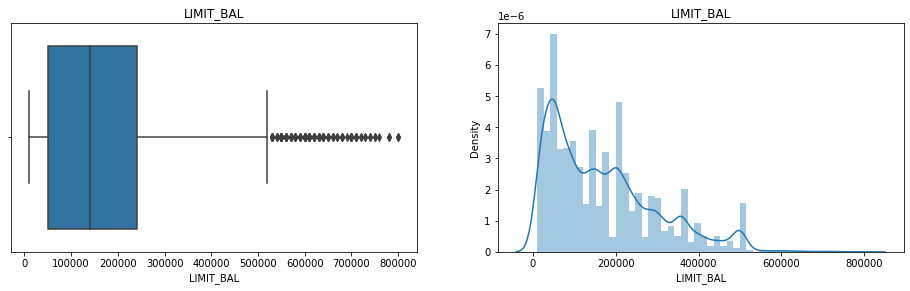

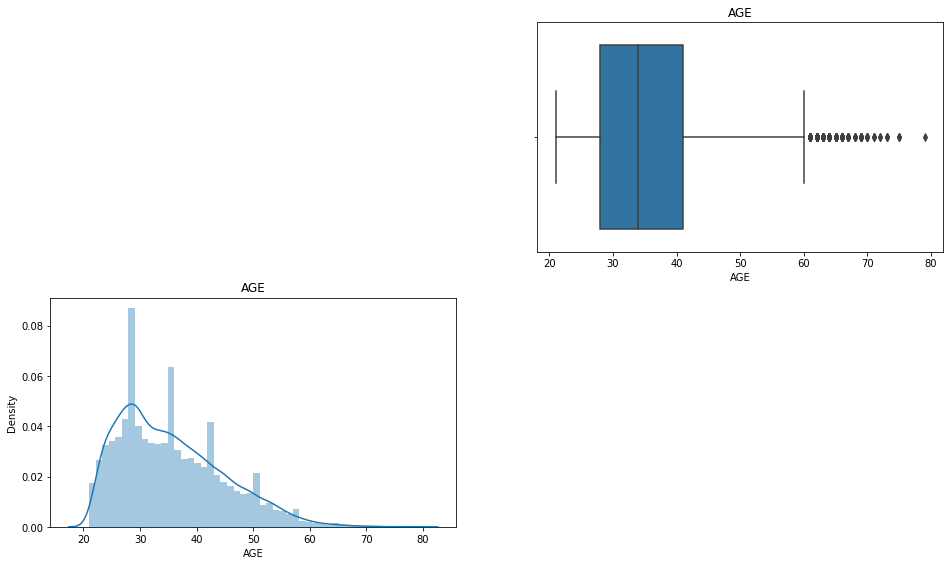

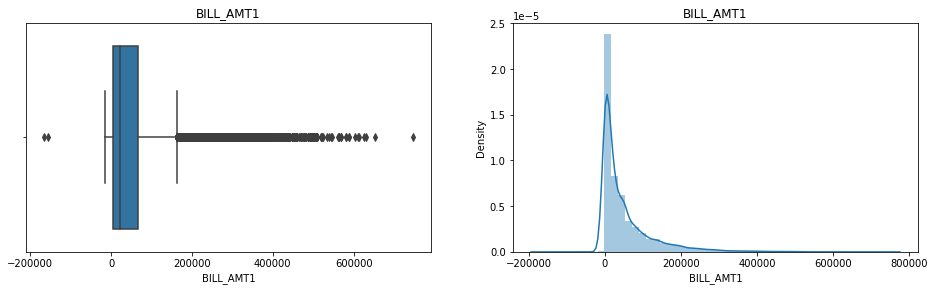

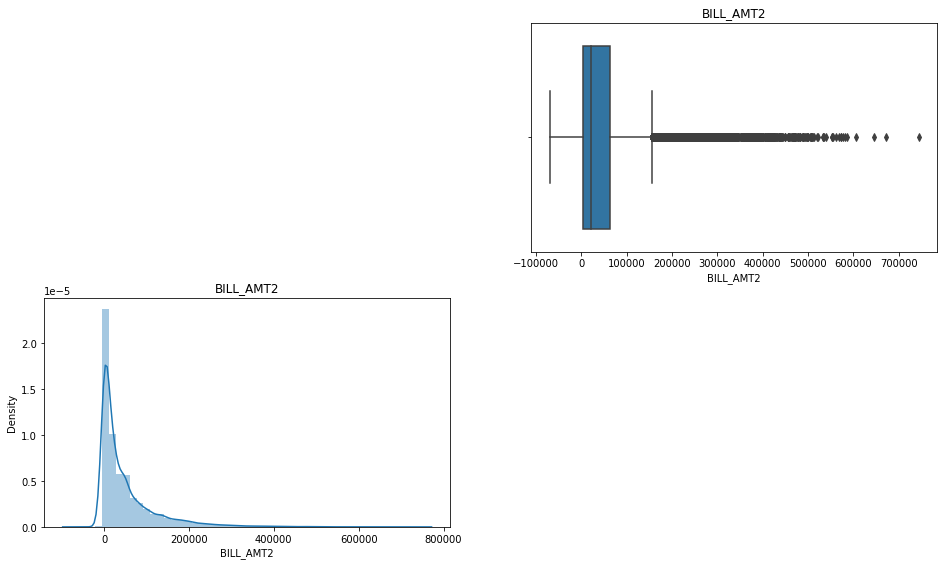

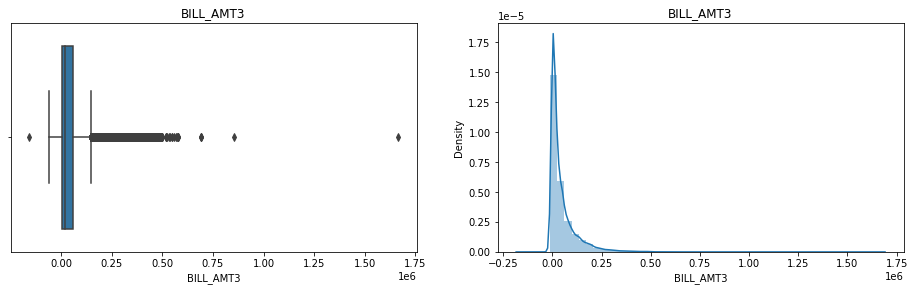

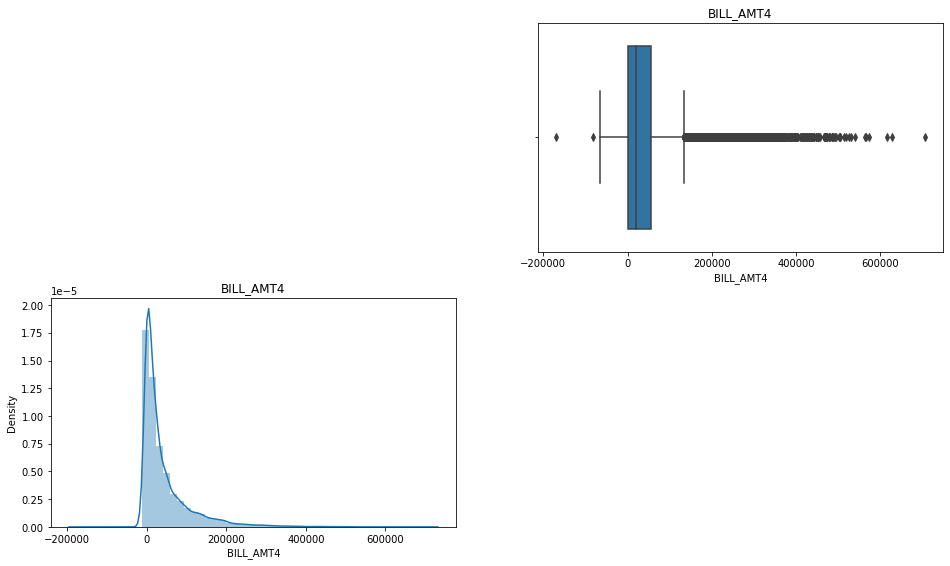

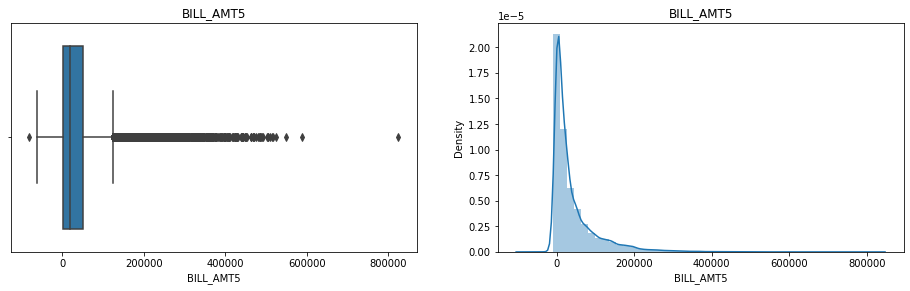

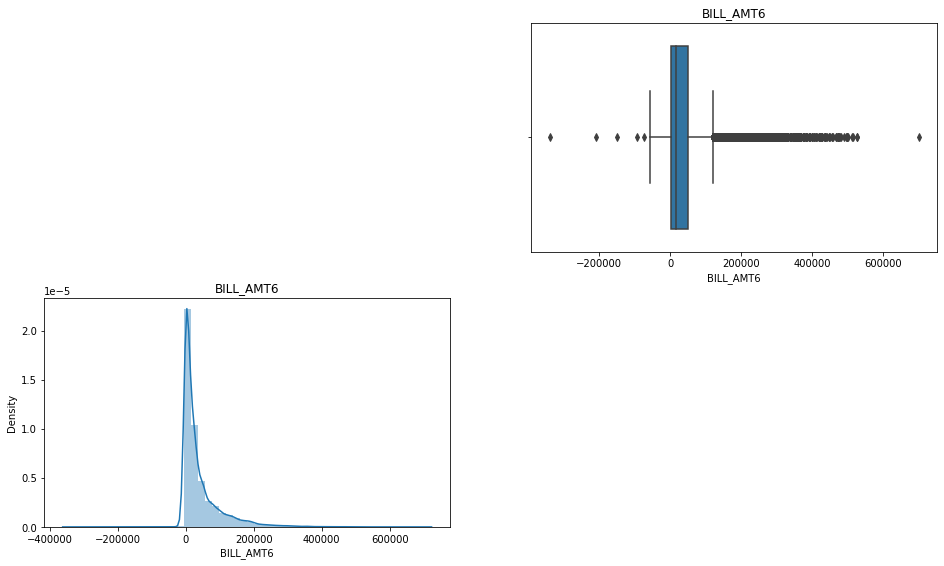

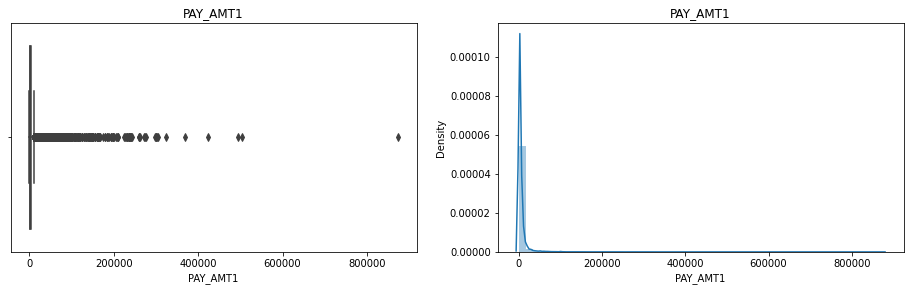

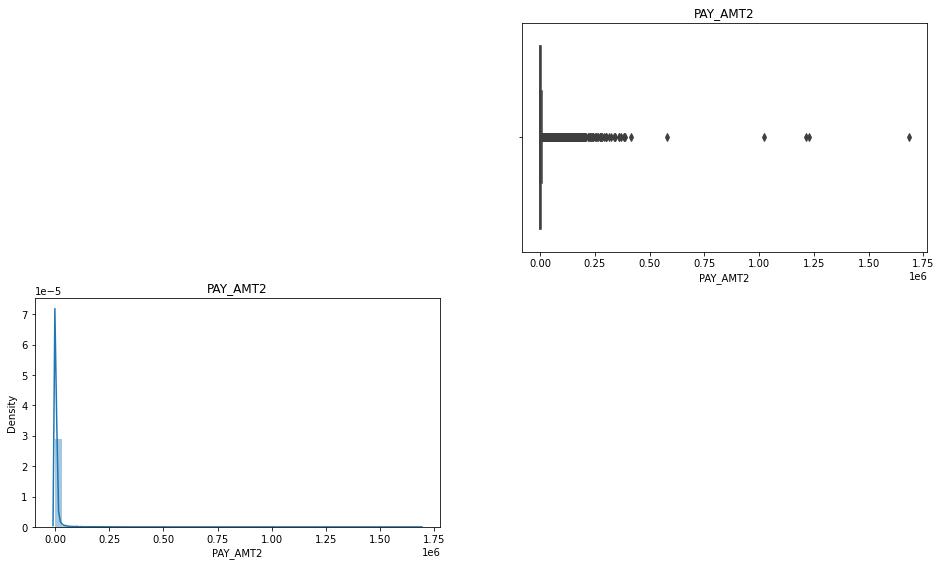

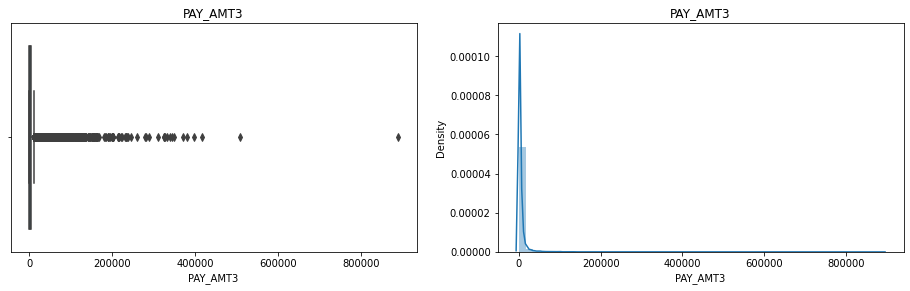

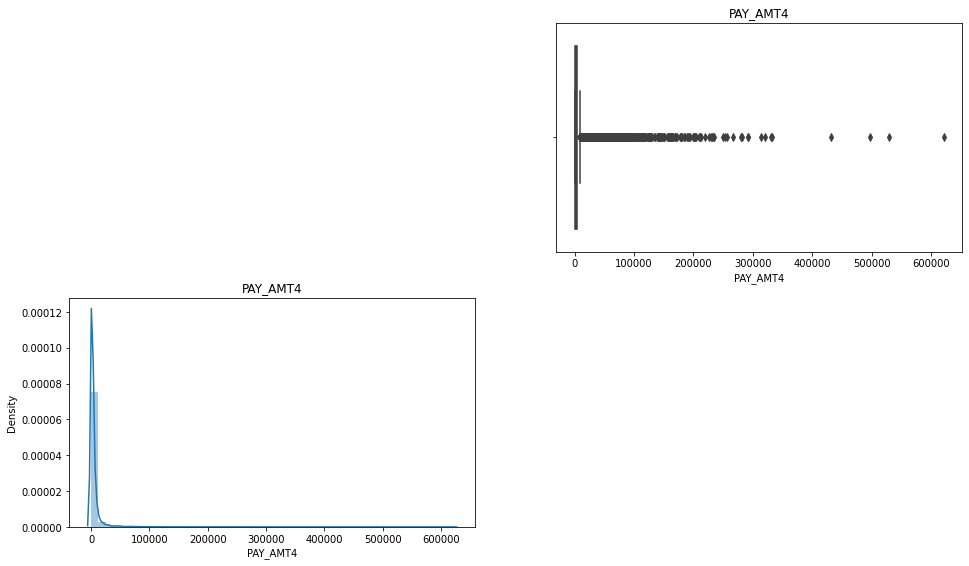

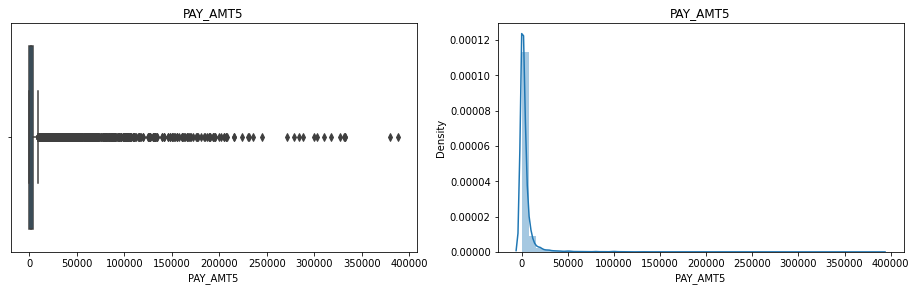

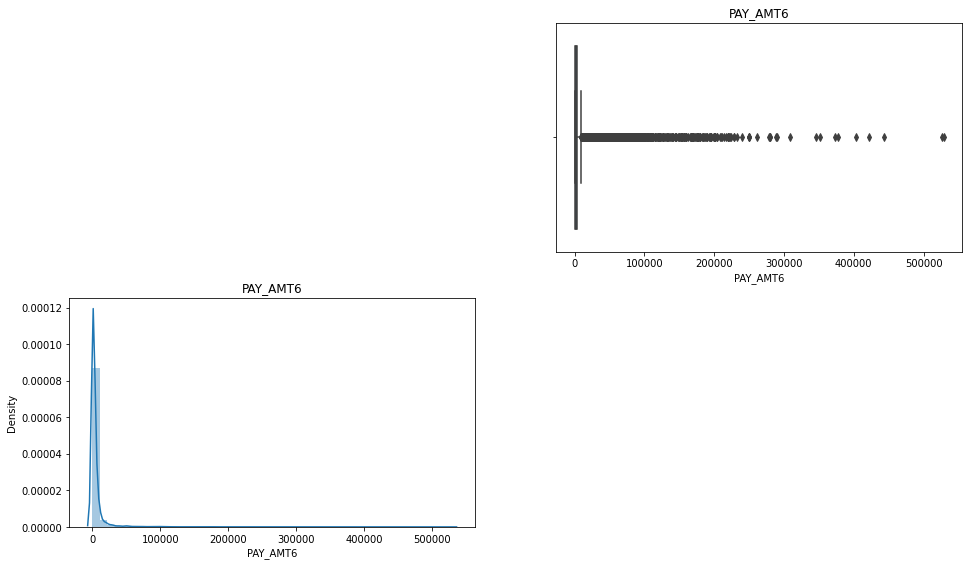

In [28]:
# X,y is originall data ( with outliers)
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state = 0)
from sklearn.neighbors import LocalOutlierFactor
for i in range(len(l1)):
    plt.figure(figsize=(16,70))
    plt.subplot(len(l1),2,i+1)
    plt.title('{}'.format(l1[i]))
    sns.boxplot(X_train[l1[i]])
    plt.subplot(len(l1),2,i+2)
    plt.title('{}'.format(l1[i]))
    sns.distplot(X_train[l1[i]])
        

In [29]:
lof = LocalOutlierFactor(n_neighbors=50)
yhat = lof.fit_predict(X_train)
yhat

array([ 1,  1, -1, ...,  1,  1,  1])

In [30]:
# select all rows that are not outliers
mask = yhat != -1
X_train2, y_train2 = X_train.values[mask, :], y_train.values[mask]
print(X_train2.shape)
print(y_train2.shape)
uni , count = np.unique(y_train2 , return_counts = True)
print(uni , count)

(19449, 24)
(19449,)
[0 1] [14833  4616]


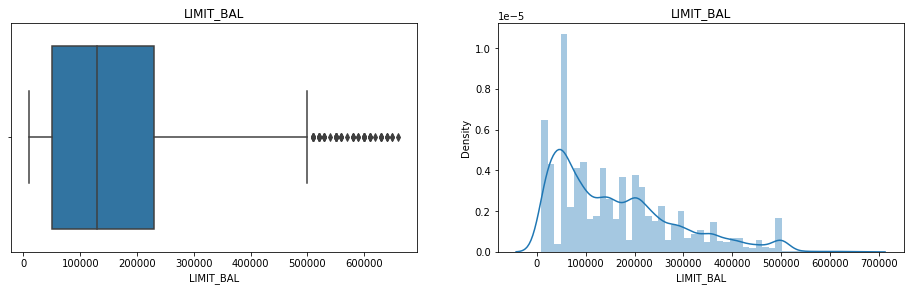

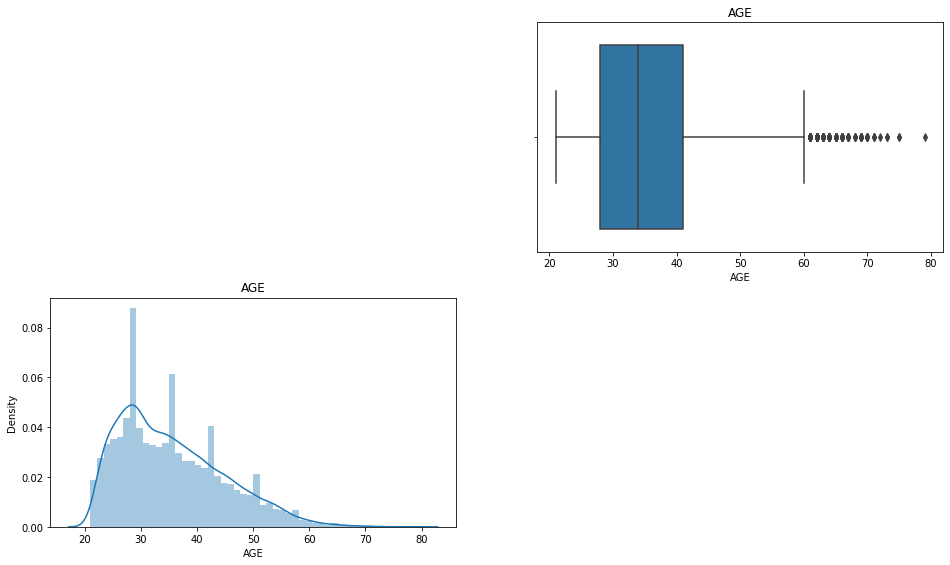

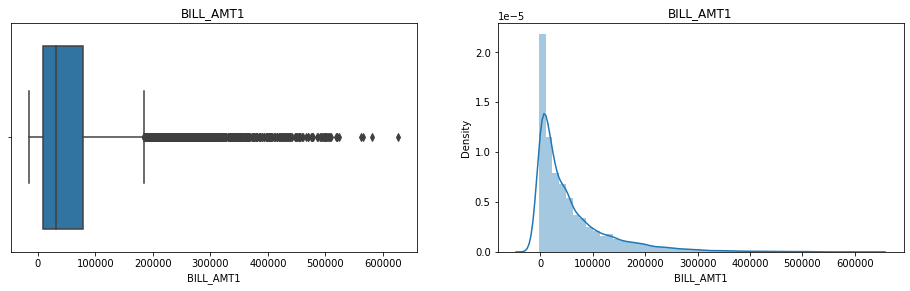

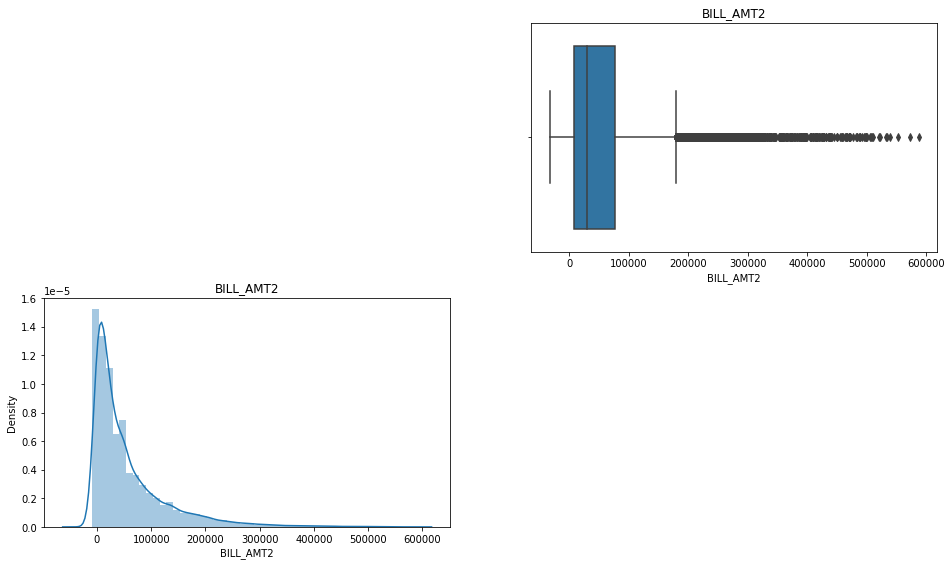

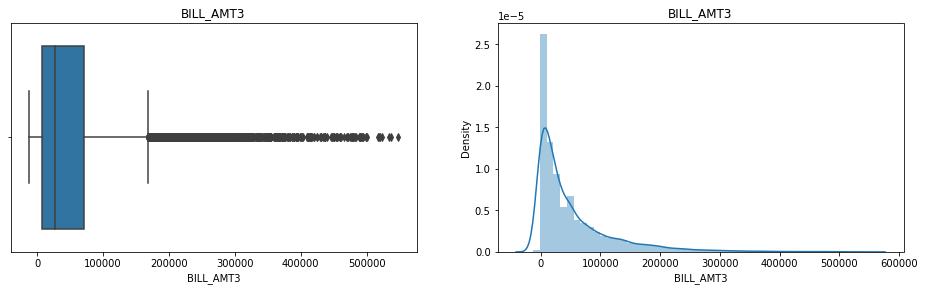

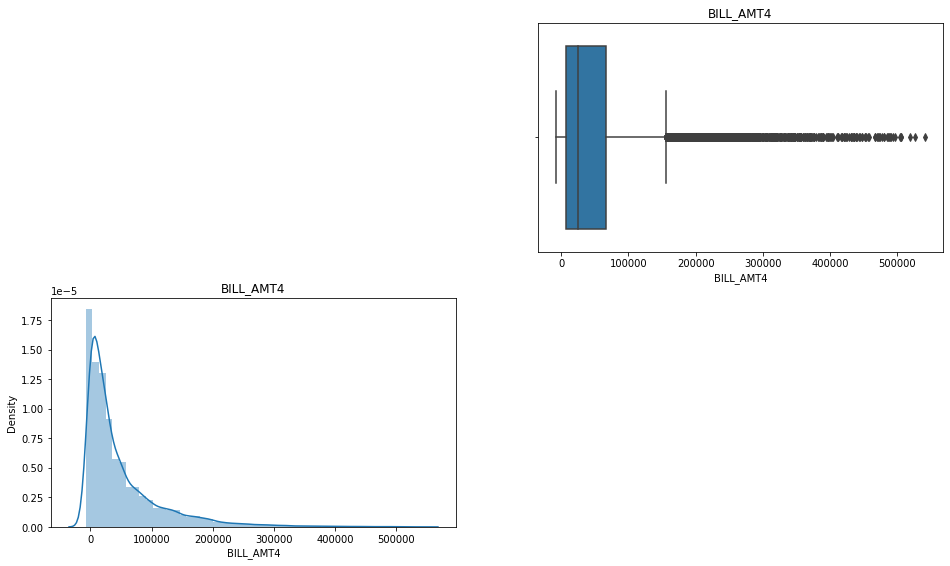

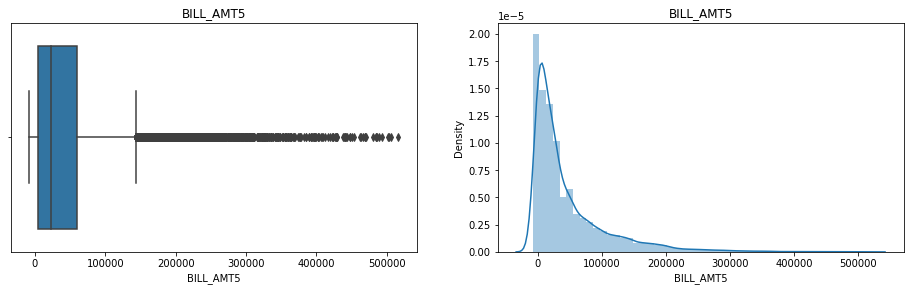

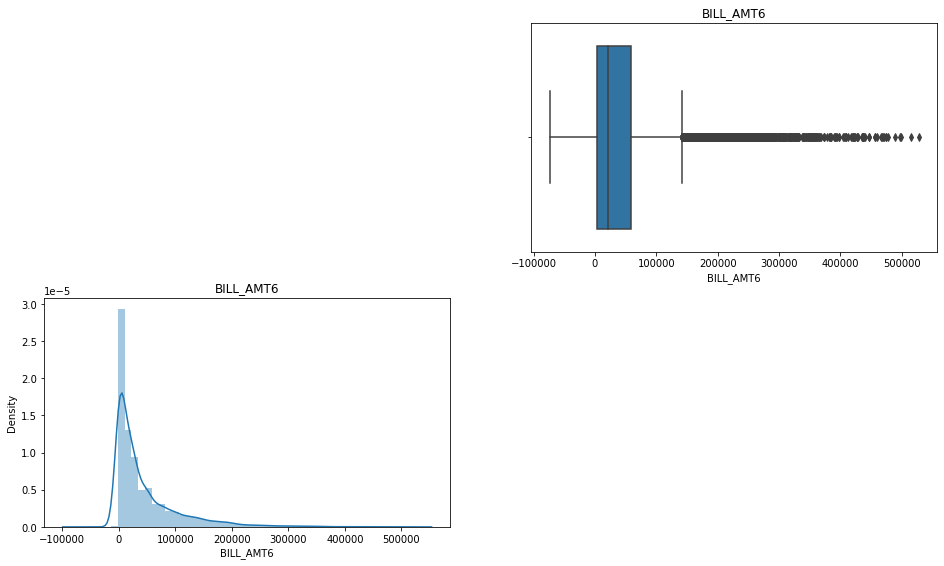

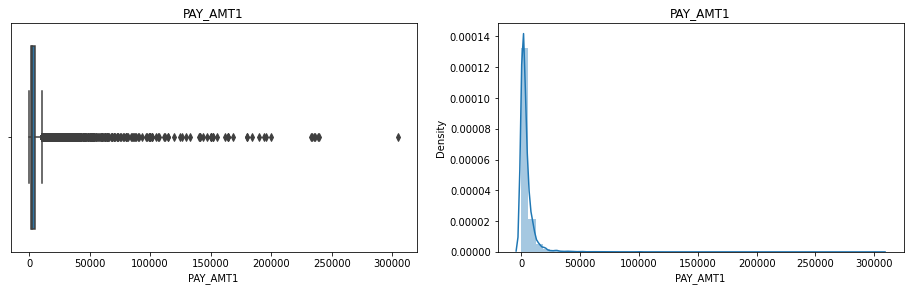

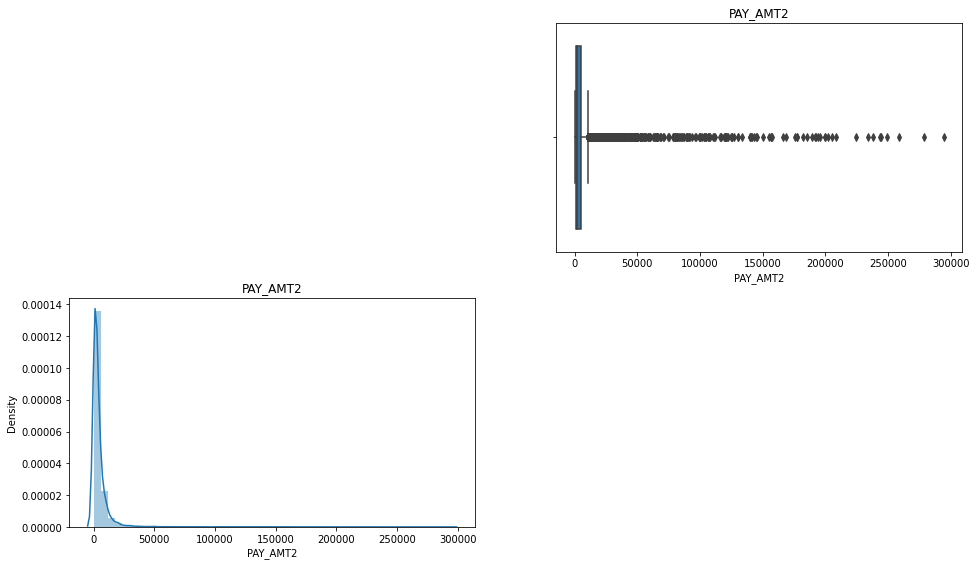

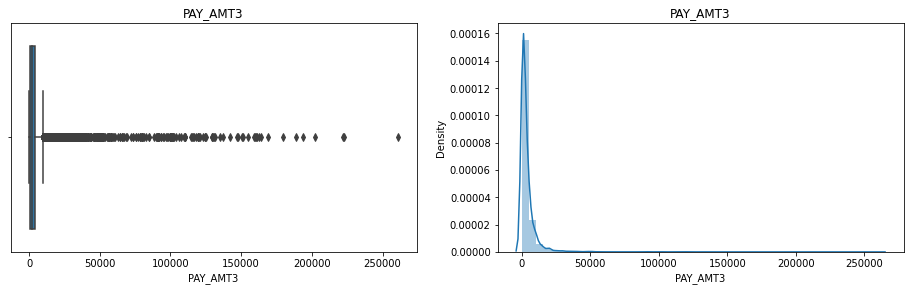

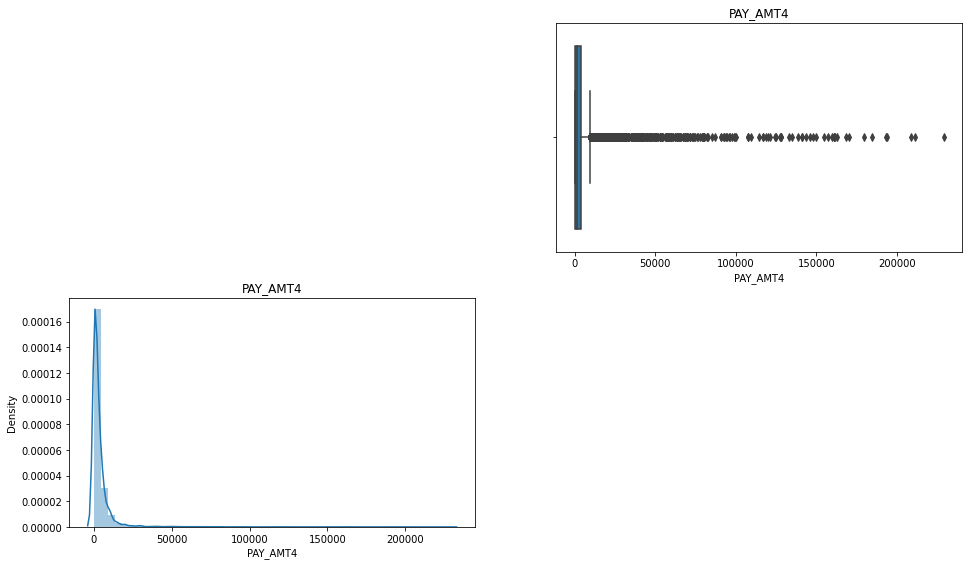

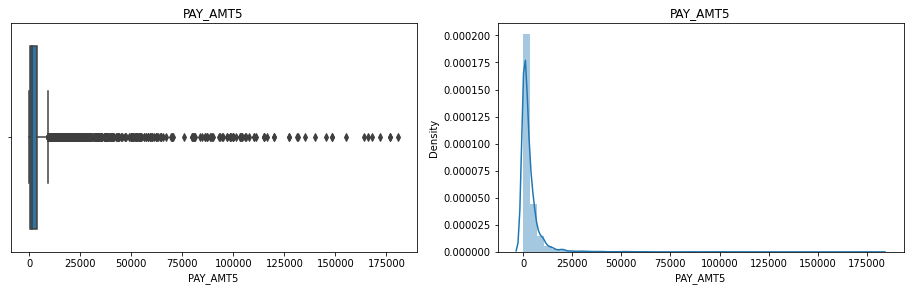

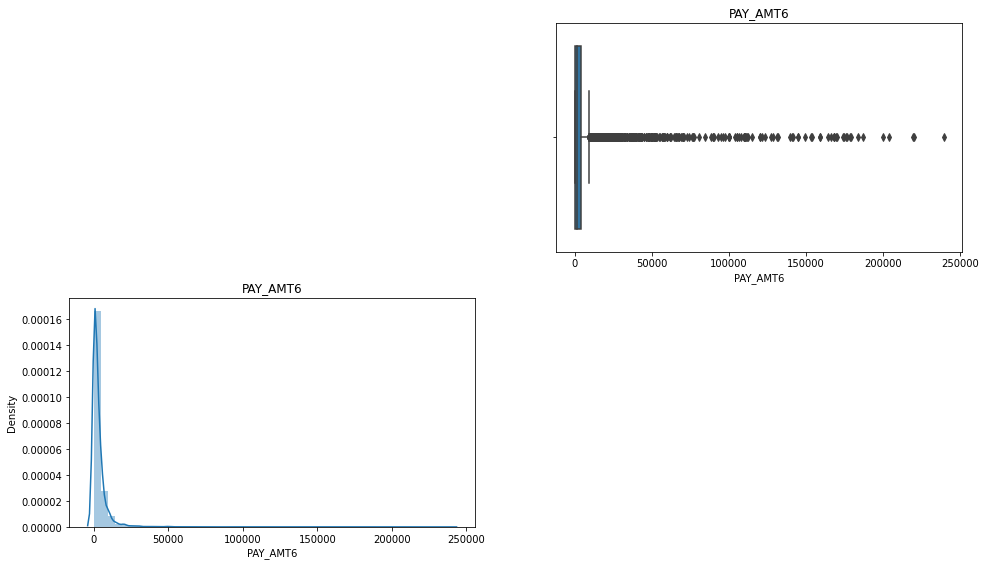

In [31]:
cols = X_train.columns
X_train2 = pd.DataFrame(data= X_train2 , columns=cols)
for i in range(len(l1)):
    plt.figure(figsize=(16,70))
    plt.subplot(len(l1),2,i+1)
    plt.title('{}'.format(l1[i]))
    sns.boxplot(X_train2[l1[i]])
    plt.subplot(len(l1),2,i+2)
    plt.title('{}'.format(l1[i]))
    sns.distplot(X_train2[l1[i]])
        

### Creating synthetic Data using Random-Over-sampler and buidling model 

In [74]:
X = df.copy(deep=True)

X.drop(columns = {'default payment next month'}, inplace= True)
y = df.loc[:,'default payment next month']
print(y.value_counts())
df['default payment next month'].astype('int32')
df['default payment next month'].value_counts()
X.head(2)
print(X.shape)

0    23364
1     6636
Name: default payment next month, dtype: int64
(30000, 24)


In [75]:
                               #Very Low accuracy with Random-over-sampler technique (72...%)
                               #Very Low accuracy with SMOTE technique (75...%)
                               
from imblearn.over_sampling import KMeansSMOTE
ros = KMeansSMOTE(sampling_strategy='auto',random_state=42, cluster_balance_threshold=0.01)
X_over, y_over = ros.fit_resample(X,y)
from collections import Counter
print(sorted(Counter(y_over).items()))

[(0, 23364), (1, 23371)]


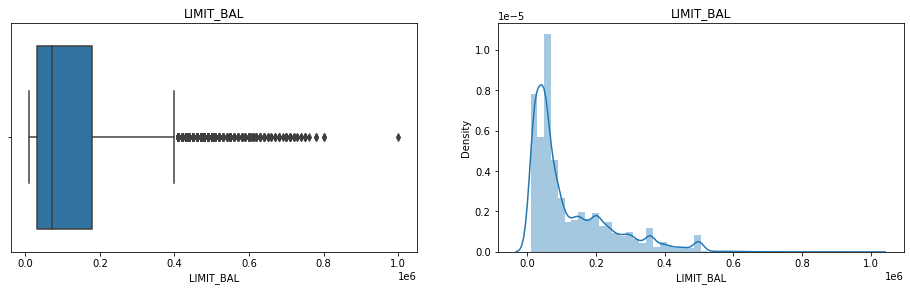

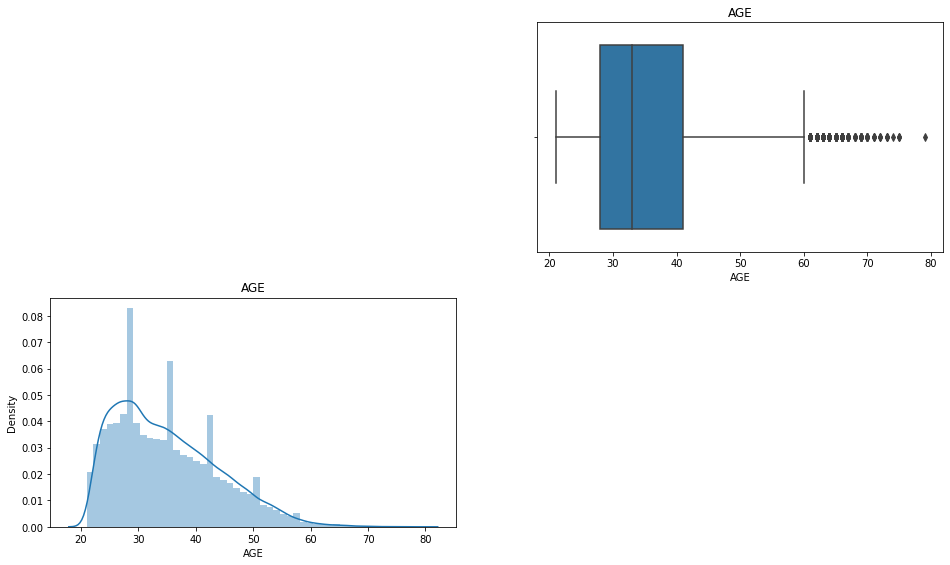

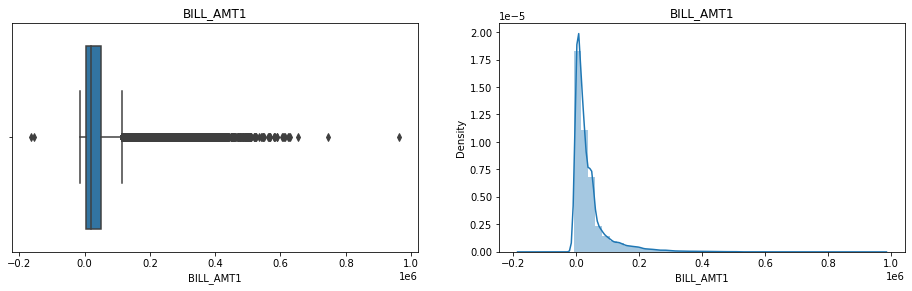

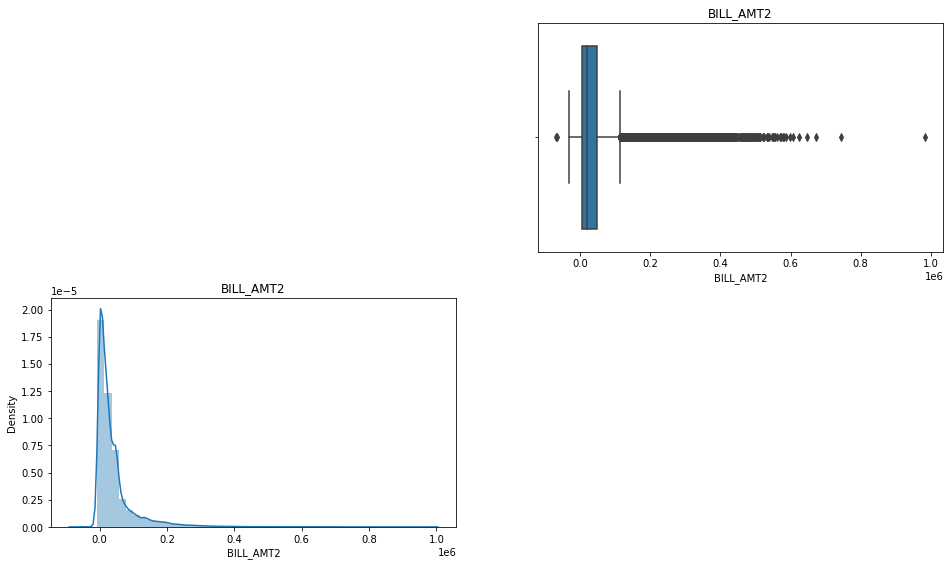

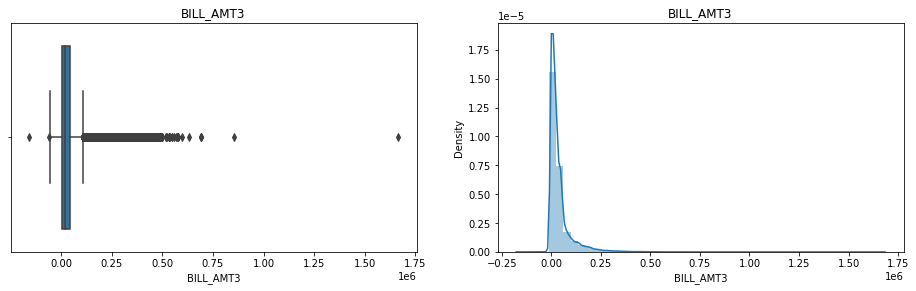

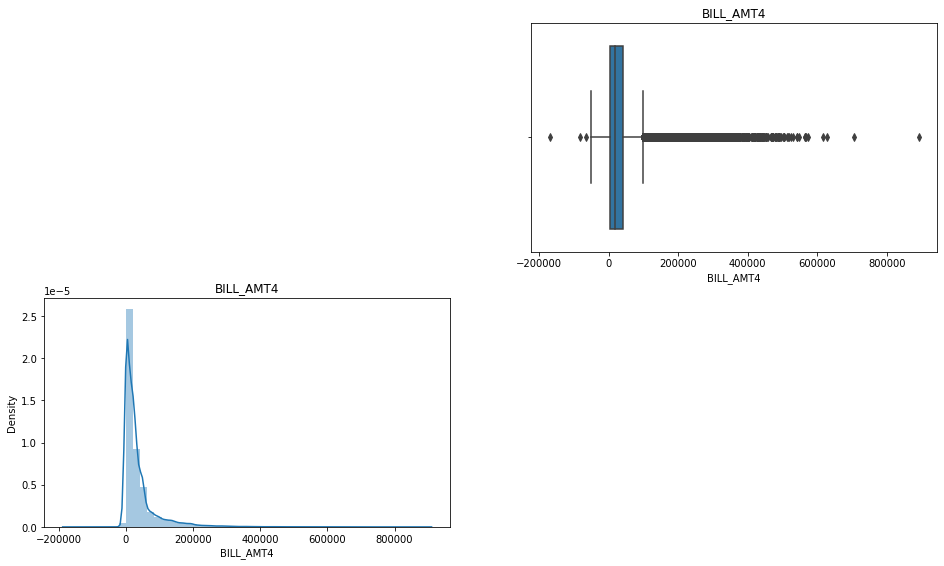

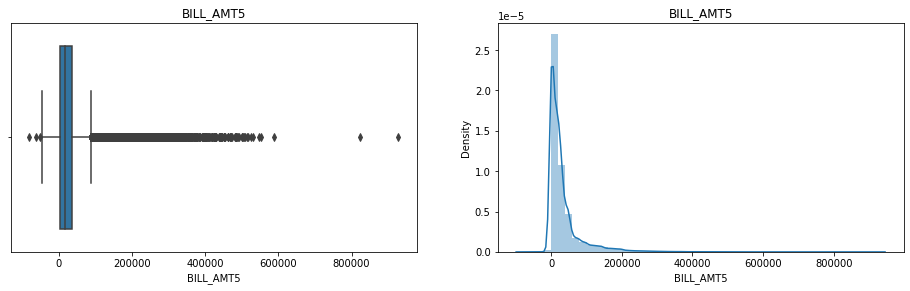

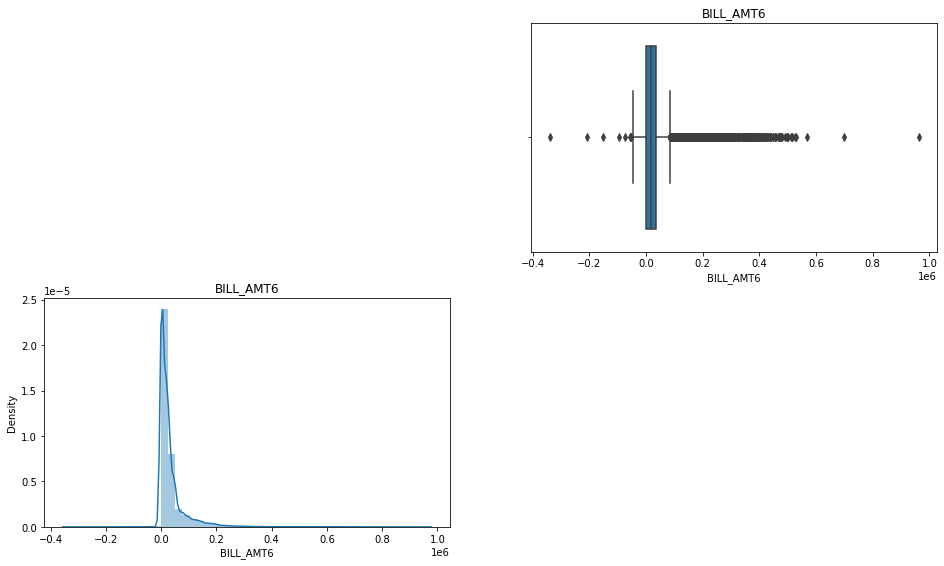

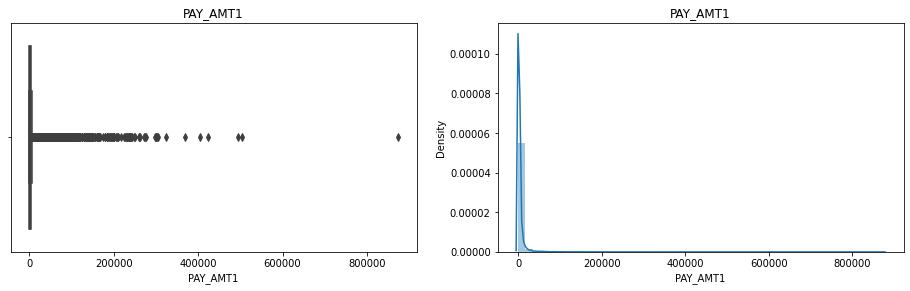

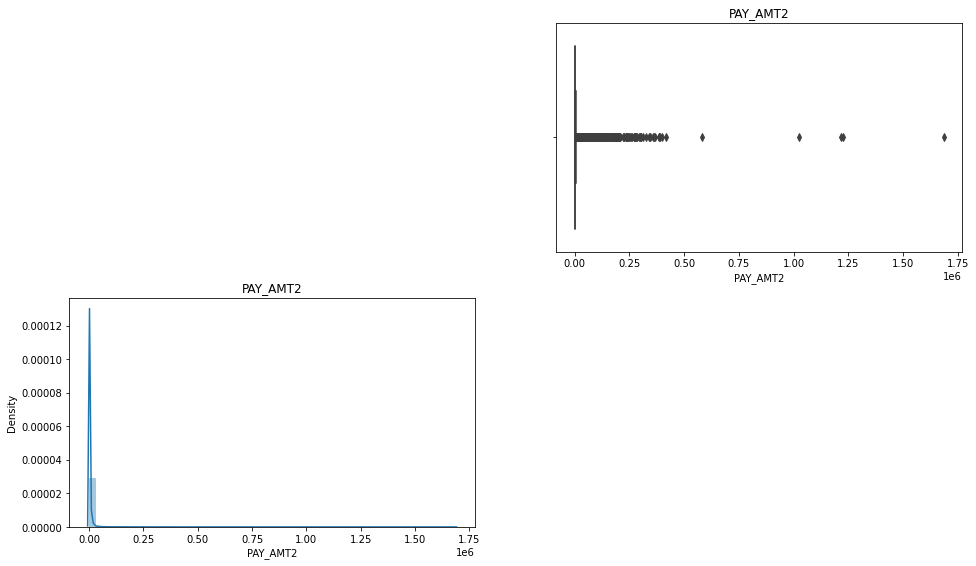

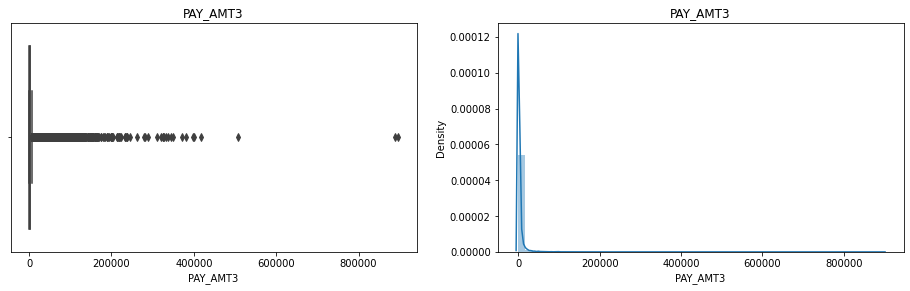

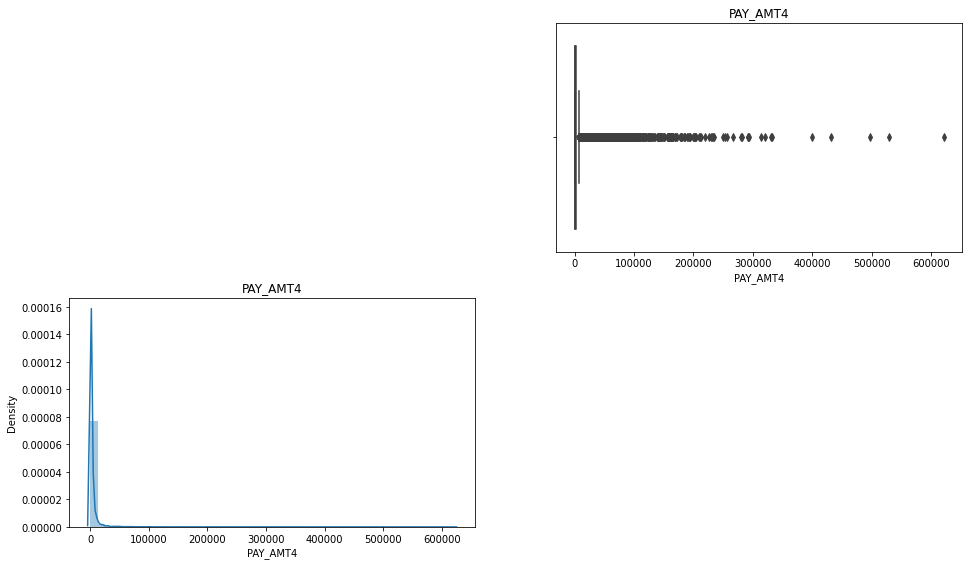

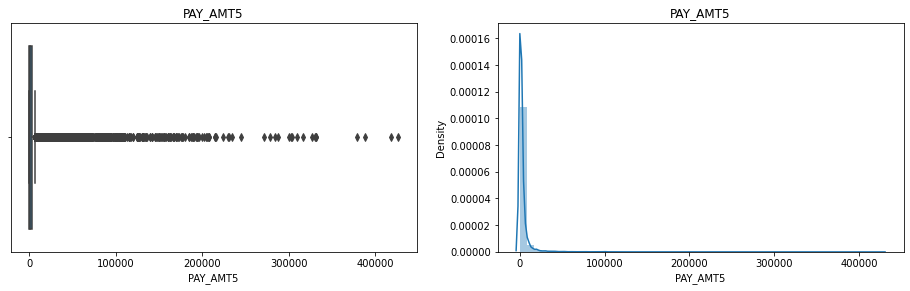

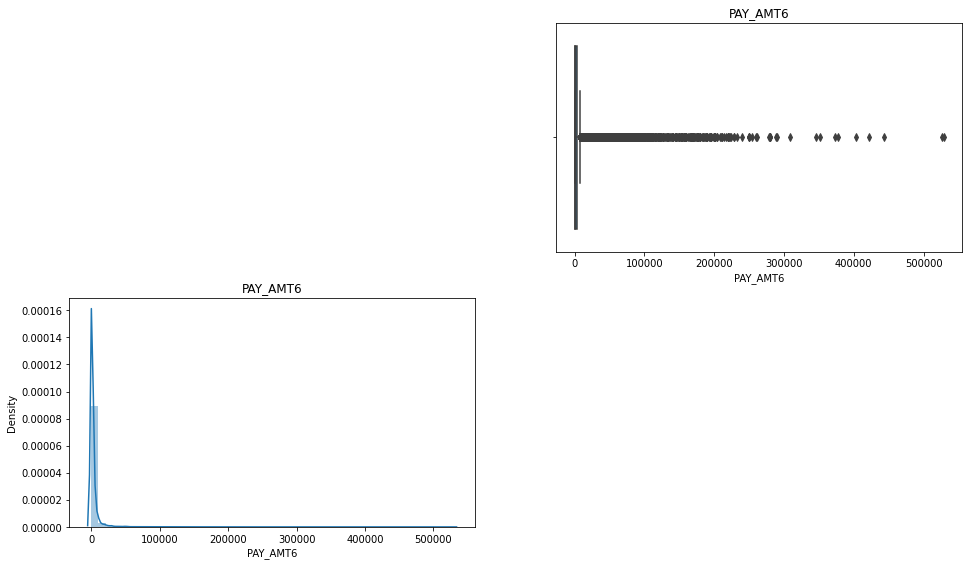

In [35]:
for i in range(len(l1)):
    plt.figure(figsize=(16,70))
    plt.subplot(len(l1),2,i+1)
    plt.title('{}'.format(l1[i]))
    sns.boxplot(X_over[l1[i]])
    plt.subplot(len(l1),2,i+2)
    plt.title('{}'.format(l1[i]))
    sns.distplot(X_over[l1[i]])
        

In [37]:
#X_norm = X_over.copy(deep = True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_norm[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']] = sc.fit_transform(X_norm[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])
#X_train2[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']] = sc.fit_transform(X_train2[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])

X_over
#X_norm

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BAL_CAT
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,4
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,3
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,2
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46730,606103,1,1,1,48,1,1,0,0,0,0,473244,466808,473851,444665,418295,415150,3228,16854,18126,14476,18973,17027,5
46731,130000,1,1,2,36,2,1,1,0,0,2,72830,74802,74452,76052,79653,81638,3735,1322,3438,5093,3438,671,4
46732,500000,1,2,1,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
46733,280000,1,2,1,40,1,2,2,2,2,2,187256,191367,194907,190280,201919,204479,8427,8000,0,14601,5814,7409,5


# Statistics

In [38]:
from scipy import stats
import statsmodels.api as sm

In [39]:
l1


['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

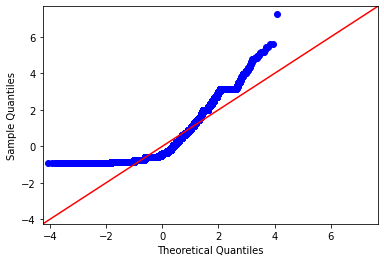

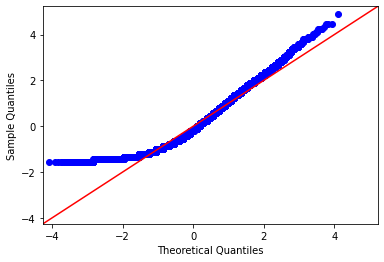

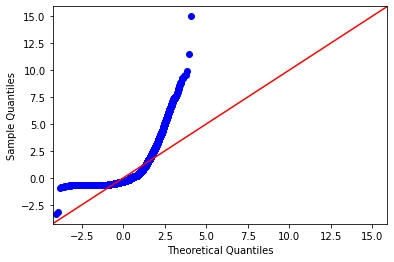

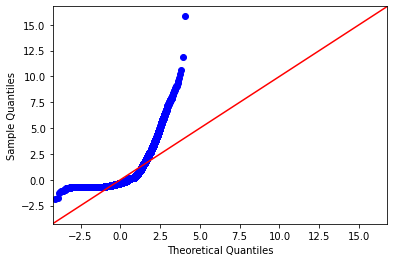

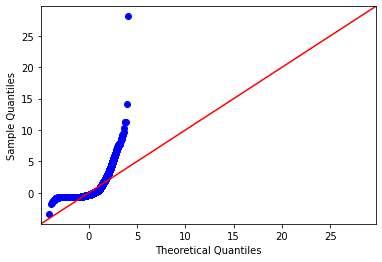

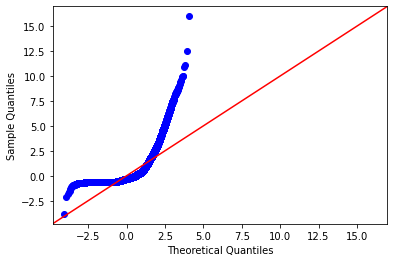

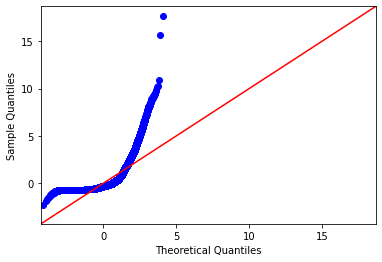

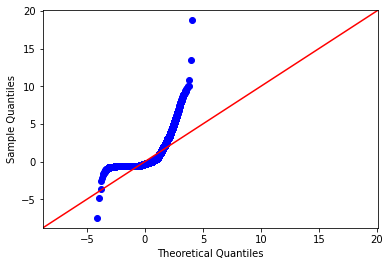

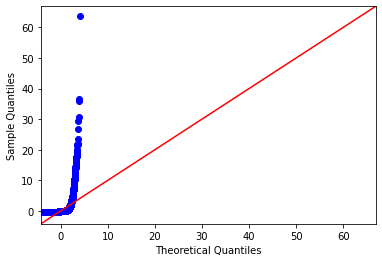

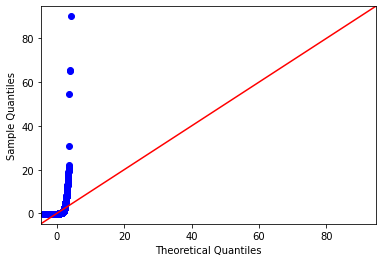

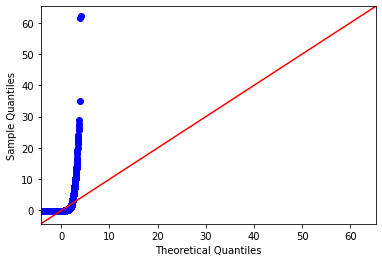

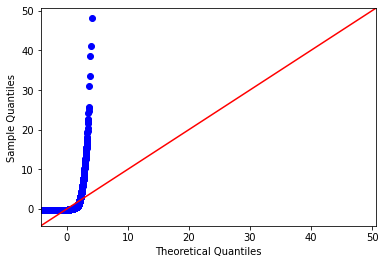

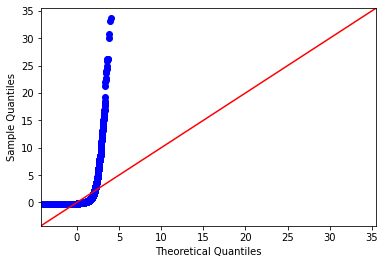

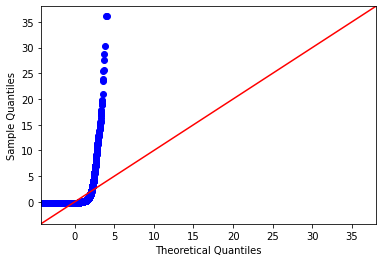

In [41]:
for i in range(len(l1)):
    plot = sm.qqplot(X_over[l1[i]] , line='45' , fit=True)

In [47]:
for i in range(len(l1)):
     print(l1[i] , stats.anderson(X_over[l1[i]], dist='norm'))


LIMIT_BAL AndersonResult(statistic=3051.7510933463636, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AGE AndersonResult(statistic=619.2287894637193, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
BILL_AMT1 AndersonResult(statistic=4754.8092861855985, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
BILL_AMT2 AndersonResult(statistic=4693.312865692293, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
BILL_AMT3 AndersonResult(statistic=4807.881848477657, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
BILL_AMT4 AndersonResult(statistic=4932.321789898029, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. 

In [76]:
print(np.abs(-23456), np.abs(23456) )
for i in range(len(l1)):
    X_over[l1[i]] = X_over[l1[i]].apply(lambda x : np.abs(x))
    X_over[l1[i]] = np.where(X_over[l1[i]] == 0 , 1,X_over[l1[i]]) 
X_over

23456 23456


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BAL_CAT
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,1,1,1,1,689,1,1,1,1,1
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1,1000,1000,1000,1,2000,4
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,3
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,2
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46730,606103,1,1,1,48,1,1,0,0,0,0,473244,466808,473851,444665,418295,415150,3228,16854,18126,14476,18973,17027,5
46731,130000,1,1,2,36,2,1,1,0,0,2,72830,74802,74452,76052,79653,81638,3735,1322,3438,5093,3438,671,4
46732,500000,1,2,1,55,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,5
46733,280000,1,2,1,40,1,2,2,2,2,2,187256,191367,194907,190280,201919,204479,8427,8000,1,14601,5814,7409,5


In [77]:
for i in range(len(l1)):
    _ , l = stats.boxcox(X_over[l1[i]])
    print(l,":",l1[i])

-0.012512475486891581 : LIMIT_BAL
-0.4787067295063131 : AGE
0.24128258488820395 : BILL_AMT1
0.2460015031782625 : BILL_AMT2
0.24570448105632012 : BILL_AMT3
0.24423796324851782 : BILL_AMT4
0.2379071605062919 : BILL_AMT5
0.22846682322781517 : BILL_AMT6
0.21702027197029006 : PAY_AMT1
0.20742309343131038 : PAY_AMT2
0.1860240498850702 : PAY_AMT3
0.1713448101103666 : PAY_AMT4
0.17026399577254162 : PAY_AMT5
0.15623396639707327 : PAY_AMT6


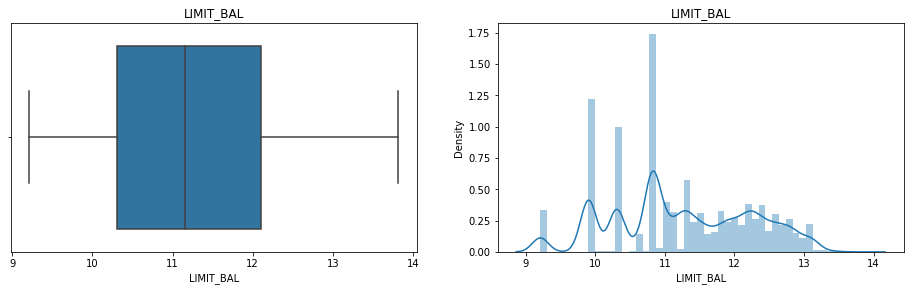

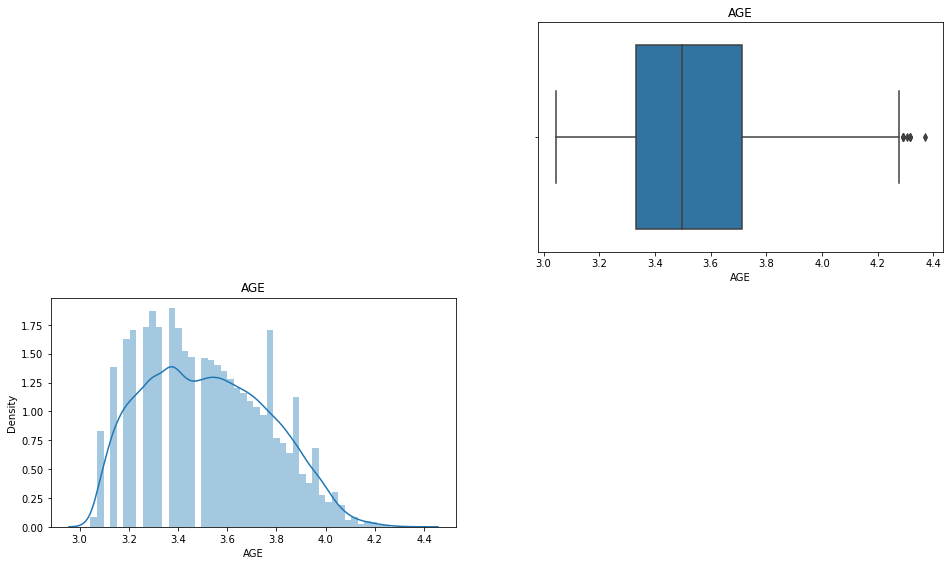

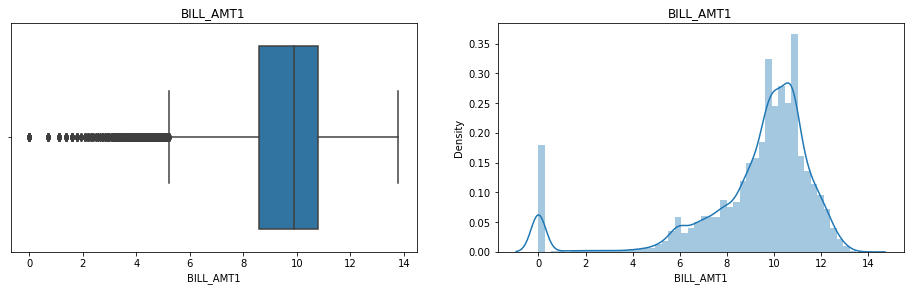

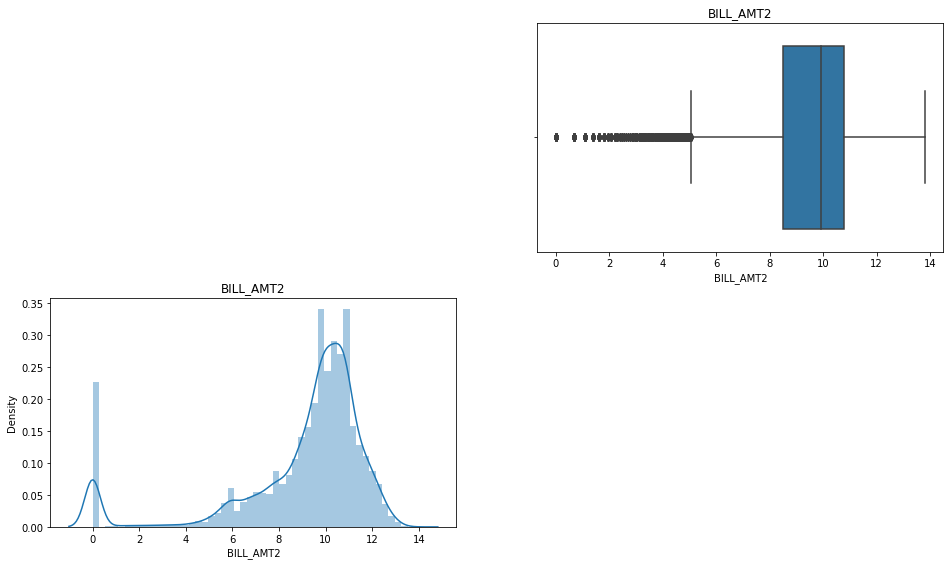

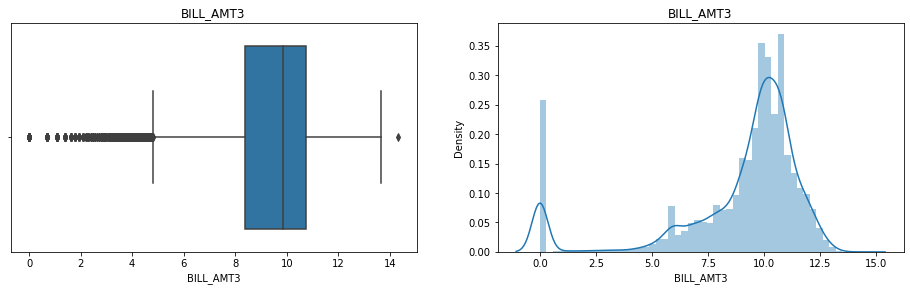

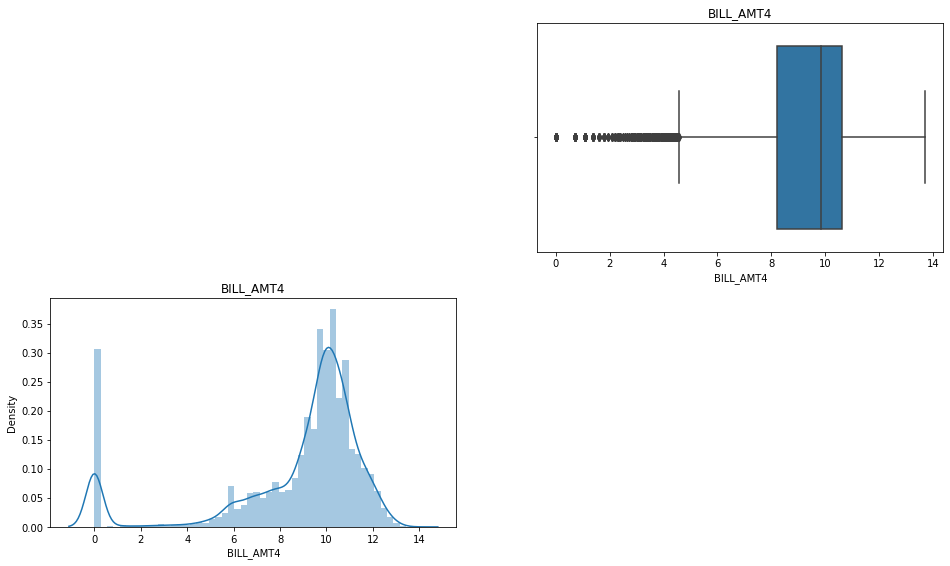

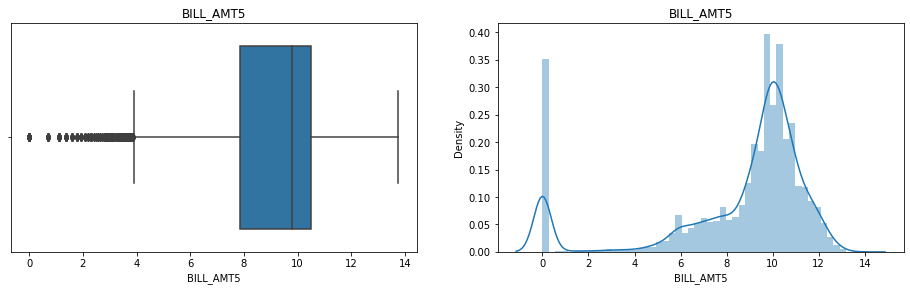

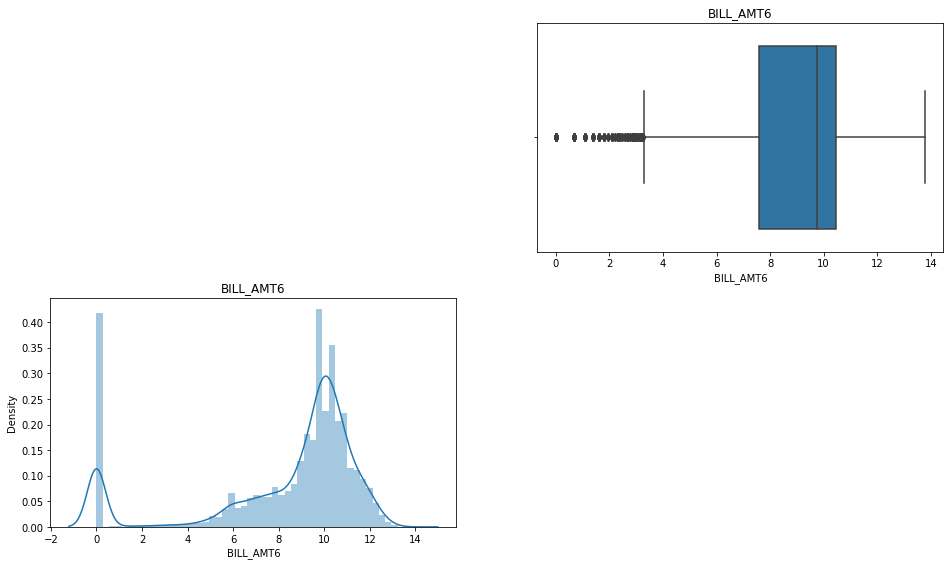

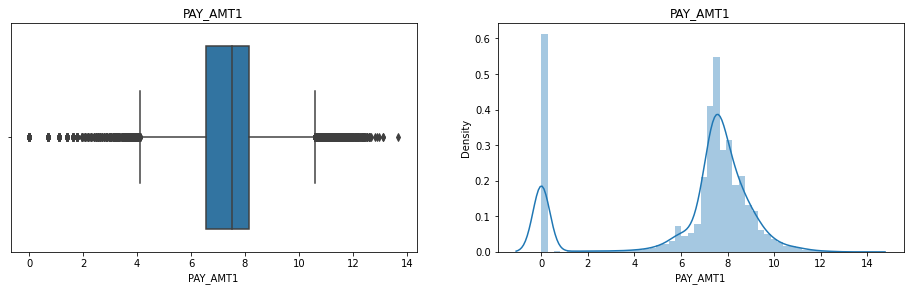

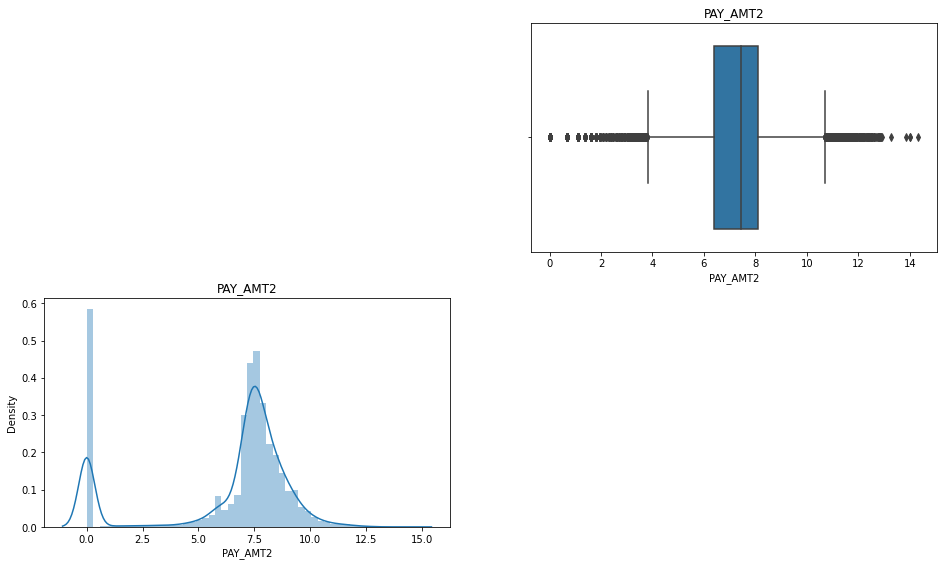

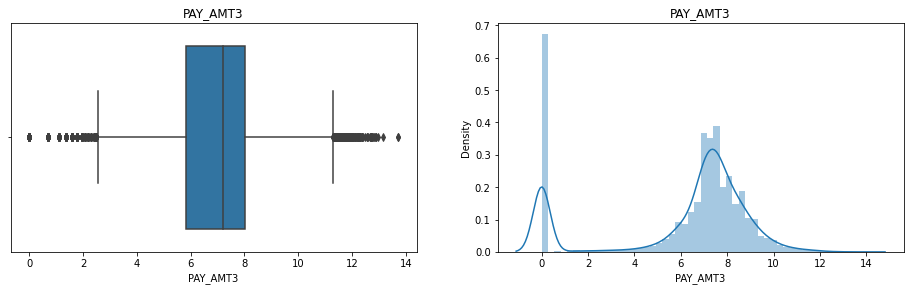

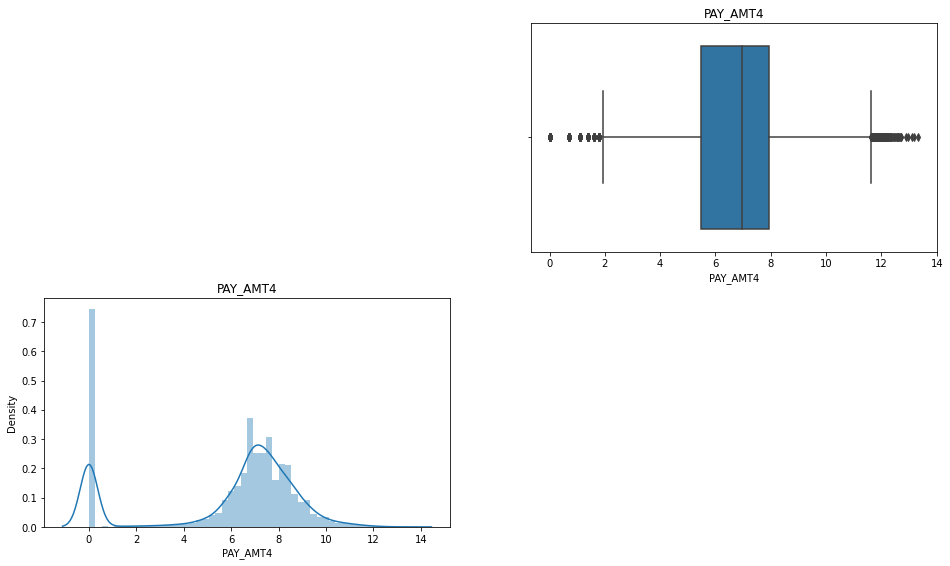

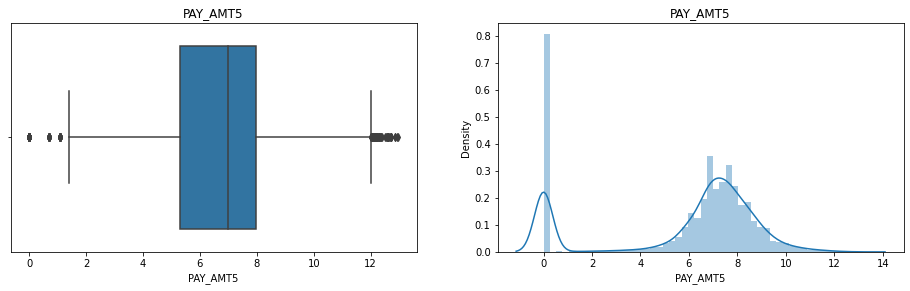

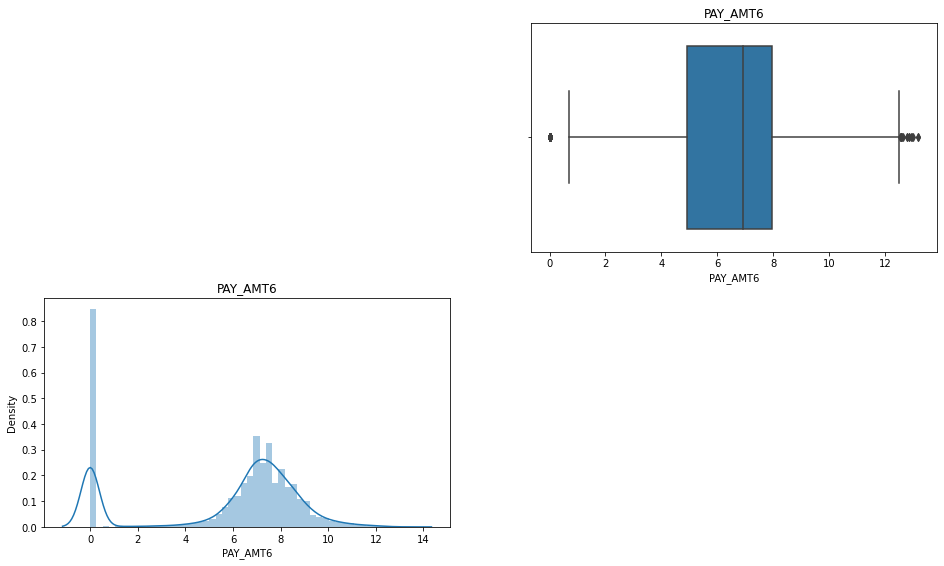

In [78]:
for i in range(len(l1)):
    X_over[l1[i]] = X_over[l1[i]].apply(lambda x : np.log(x))
for i in range(len(l1)):
    plt.figure(figsize=(16,70))
    plt.subplot(len(l1),2,i+1)
    plt.title('{}'.format(l1[i]))
    sns.boxplot(X_over[l1[i]])
    plt.subplot(len(l1),2,i+2)
    plt.title('{}'.format(l1[i]))
    sns.distplot(X_over[l1[i]])
        

In [81]:
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense , BatchNormalization
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.1, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
n_features = X_train.shape[1]
n_features

(42061, 24)
(42061,)
(4674, 24)
(4674,)


24

In [82]:
from tensorflow.keras import Sequential

model = Sequential()
model.add(Dense(415, activation='elu', kernel_initializer='he_normal', input_shape=(n_features,))) #input_dim=34 (alternative)
model.add(BatchNormalization())
model.add(Dense(20, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(270, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(270, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(185, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(280, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(95, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(75, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(30, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(325, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

In [83]:
model.compile(
        optimizer=keras.optimizers.Adam(0.001),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    

In [85]:
# Building Model using Random Oversampler and with skewness 
# fit the model
%time
print(X_train2.shape)
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

Wall time: 0 ns
(19449, 24)
Epoch 1/150
1315/1315 - 14s - loss: 0.4702 - accuracy: 0.7831
Epoch 2/150
1315/1315 - 10s - loss: 0.4498 - accuracy: 0.7975
Epoch 3/150
1315/1315 - 10s - loss: 0.4423 - accuracy: 0.8003
Epoch 4/150
1315/1315 - 10s - loss: 0.4361 - accuracy: 0.8029
Epoch 5/150
1315/1315 - 13s - loss: 0.4330 - accuracy: 0.8047
Epoch 6/150
1315/1315 - 11s - loss: 0.4293 - accuracy: 0.8065
Epoch 7/150
1315/1315 - 10s - loss: 0.4257 - accuracy: 0.8102
Epoch 8/150
1315/1315 - 10s - loss: 0.4220 - accuracy: 0.8124
Epoch 9/150
1315/1315 - 10s - loss: 0.4184 - accuracy: 0.8152
Epoch 10/150
1315/1315 - 10s - loss: 0.4162 - accuracy: 0.8159
Epoch 11/150
1315/1315 - 10s - loss: 0.4147 - accuracy: 0.8157
Epoch 12/150
1315/1315 - 10s - loss: 0.4127 - accuracy: 0.8163
Epoch 13/150
1315/1315 - 11s - loss: 0.4116 - accuracy: 0.8169
Epoch 14/150
1315/1315 - 11s - loss: 0.4064 - accuracy: 0.8207
Epoch 15/150
1315/1315 - 12s - loss: 0.4063 - accuracy: 0.8207
Epoch 16/150
1315/1315 - 11s - loss:

Epoch 131/150
1315/1315 - 10s - loss: 0.3226 - accuracy: 0.8617
Epoch 132/150
1315/1315 - 10s - loss: 0.3261 - accuracy: 0.8596
Epoch 133/150
1315/1315 - 10s - loss: 0.3215 - accuracy: 0.8618
Epoch 134/150
1315/1315 - 10s - loss: 0.3203 - accuracy: 0.8624
Epoch 135/150
1315/1315 - 10s - loss: 0.3197 - accuracy: 0.8626
Epoch 136/150
1315/1315 - 10s - loss: 0.3208 - accuracy: 0.8617
Epoch 137/150
1315/1315 - 10s - loss: 0.3200 - accuracy: 0.8626
Epoch 138/150
1315/1315 - 10s - loss: 0.3171 - accuracy: 0.8635
Epoch 139/150
1315/1315 - 10s - loss: 0.3194 - accuracy: 0.8644
Epoch 140/150
1315/1315 - 10s - loss: 0.3203 - accuracy: 0.8608
Epoch 141/150
1315/1315 - 10s - loss: 0.3190 - accuracy: 0.8623
Epoch 142/150
1315/1315 - 10s - loss: 0.3176 - accuracy: 0.8652
Epoch 143/150
1315/1315 - 10s - loss: 0.3176 - accuracy: 0.8634
Epoch 144/150
1315/1315 - 10s - loss: 0.3224 - accuracy: 0.8611
Epoch 145/150
1315/1315 - 10s - loss: 0.3192 - accuracy: 0.8628
Epoch 146/150
1315/1315 - 10s - loss: 0.

In [89]:
# evaluate the model


loss, acc = model.evaluate(X_test, y_test, verbose=2)
acc = acc*100
print('Test Accuracy: %.3f' % acc)

147/147 - 0s - loss: 9.5868 - accuracy: 0.7897
Test Accuracy: 78.969


In [90]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [91]:
print(y_test.value_counts())
uni, count = np.unique(y_pred, return_counts = True)
print(uni,count)

1    2388
0    2286
Name: default payment next month, dtype: int64
[False  True] [2563 2111]


In [92]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test , y_pred)
cm

array([[1933,  353],
       [ 630, 1758]], dtype=int64)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2286
           1       0.83      0.74      0.78      2388

    accuracy                           0.79      4674
   macro avg       0.79      0.79      0.79      4674
weighted avg       0.79      0.79      0.79      4674

